# Foundations of Data Science Project

### Team Members

- Prashant - 2020CSB1113
- Prachi - 2020EEB1048
- Anubhav - 2020CSB1073
- Shyam - 2020CSB1110

#  Problem Statement 1

# Use Decision Tree, Random Forests, KNN and LDA to predict whether the person will default. Compare the findings from different methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing data
data = pd.read_excel('Data/Default.xlsx')
data


c:\Users\mitta\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]

In [5]:
data.shape

(10000, 5)

### DATA Information

In [6]:
#checking null values: here no null values are present
data.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [7]:
#There is an unnamed column prensent in the data which is serial number of rows we don't need to consider this our model hence
#dropped
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [8]:
data.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [9]:
#after droping only deafult, student, balance and income are present as columns
#here attributes will be student(catergorical data),balance and income(numerical data)
columns=data.columns
columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [10]:
#statistical information about the data
data.describe()

balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495

In [11]:
#X: attributes (independent variables)
X=data.iloc[:,1:4].values
X


array([['No', 729.5264952072858, 44361.62507426687],
       ['Yes', 817.1804065554977, 12106.134700314931],
       ['No', 1073.549164011728, 31767.138947399937],
       ...,
       ['No', 845.4119892174481, 58636.156983807115],
       ['No', 1569.0090533837224, 36669.112364583314],
       ['Yes', 200.92218263479663, 16862.952320940734]], dtype=object)

In [12]:
#Y : dependent variables (categorical : hence classification is to be performed)
Y=data.iloc[:,0:1].values
Y


array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

### Transforming the nan Values

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

### Labelling student column with Label Encoder

In [14]:
X[:,0]=lb.fit_transform(X[:,0])
X

array([[0, 729.5264952072858, 44361.62507426687],
       [1, 817.1804065554977, 12106.134700314931],
       [0, 1073.549164011728, 31767.138947399937],
       ...,
       [0, 845.4119892174481, 58636.156983807115],
       [0, 1569.0090533837224, 36669.112364583314],
       [1, 200.92218263479663, 16862.952320940734]], dtype=object)

### Labelling defalut column with Label Encoder


In [15]:
Y=lb.fit_transform(Y)
Y

c:\Users\mitta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

The number of instances for No (0): 9667 
The number of instances for Yes (1) : 333


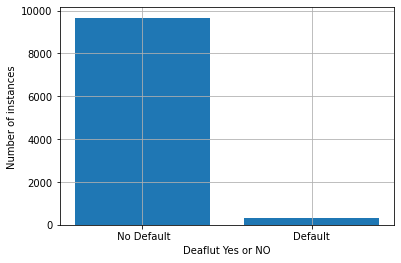

In [16]:
# As we can see from the data there are rare occurence of a default but if it occurs we have to predict is correctly
frequency_table = data['default'].value_counts()# This commands gives the
# frequency of occurence of distinct values in the column(in this case 0 and 1)
print('The number of instances for No (0):',frequency_table[0]
,'\nThe number of instances for Yes (1) :', frequency_table[1])
plt.bar([' No Default', 'Default'],[frequency_table[0], frequency_table[1]])
plt.xlabel('Deaflut Yes or NO')
plt.ylabel('Number of instances')
plt.grid(True)

### As a part of EDA we observe the realtion among different variables through correlation, bar plots and pair plots

C:\Users\mitta\AppData\Local\Temp\ipykernel_16080\3592908055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot:>

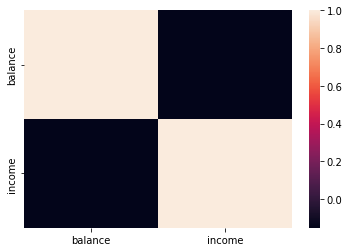

In [17]:
#correlation heatmap
sns.heatmap(data.corr())

### Scatter Plot between Balance and Income


<AxesSubplot:xlabel='income', ylabel='balance'>

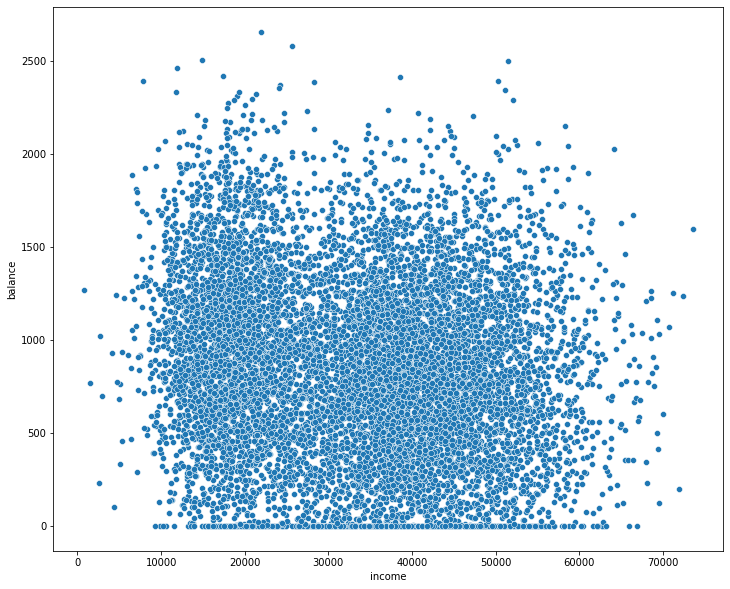

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data,x=data[columns[3]],y=data[columns[2]])

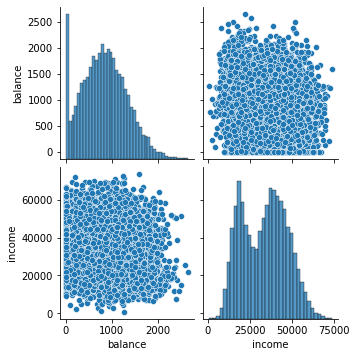

In [19]:
sns.pairplot(data)

### Plotting Bar plot between Income and Balance to see the realtion between two variables


In [20]:
x=np.array(X[:,2])
y=np.array(X[:,1])

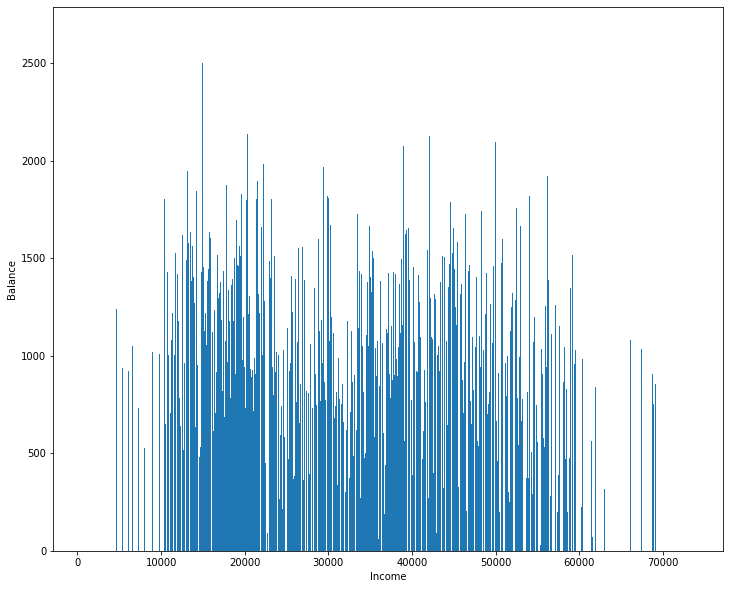

In [21]:
plt.figure(figsize=(12,10))
plt.bar(x,y,width=10)
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()

### Seeing relation between Student and Default


In [22]:
plot_me = data.groupby(["student","default"])[["default"]].count().rename(columns={"student":"default"})
plot_me

default
student default         
No      No          6850
        Yes          206
Yes     No          2817
        Yes          127

<AxesSubplot:xlabel='student'>

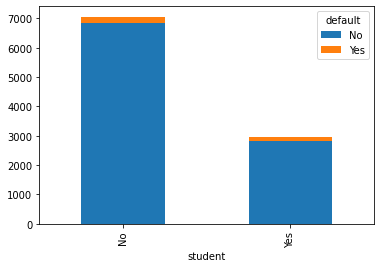

In [23]:
pd.crosstab(data['student'],data['default']).plot(kind="bar",stacked=True)

### Splitting the data set to perform Validation Set Approach on Models

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state = 0)
X_train

array([[0, 1008.9465398810564, 31235.78292334798],
       [0, 1060.807429270215, 39174.05636070535],
       [1, 1971.663236156513, 22040.262741300565],
       ...,
       [1, 687.064419498525, 14059.457625962514],
       [1, 46.01022531753222, 13950.086947328882],
       [0, 337.57599988682637, 52192.27471781803]], dtype=object)

In [25]:
#Scaling numerical data Balance and Income
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([("encoder",StandardScaler(), [1,2])], remainder='passthrough')
X_train=np.array(ct.fit_transform(X_train))
print(X_train)


[[0.36630751861153465 -0.17572580438407878 0]
 [0.47396683067050316 0.42065671874309396 0]
 [2.364835088220968 -0.8665621141826866 1]
 ...
 [-0.30189559268546784 -1.466139935333682 1]
 [-1.632675962072456 -1.474356679414668 1]
 [-1.0274073081832977 1.398682730532869 0]]


In [26]:
#Scaling on Test data as well
X_test=np.array(ct.fit_transform(X_test))
print(X_test)


[[-1.7243501180432115 -1.4490718706776622 1]
 [-0.9133046252229762 1.6488575988768233 0]
 [0.4134873806282292 1.0630013666856182 0]
 ...
 [-0.17950901918201395 1.4492617541642774 0]
 [-0.6776759120690413 -0.6259404664481308 1]
 [1.219768655503481 0.037971950454653 0]]


### Linear Discriminant Analysis for Classification

In [27]:
#LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDAclassifier = LDA()
LDAclassifier.fit(X_train, y_train)
LDAtrainpredictions = LDAclassifier.predict(X_train)
LDAtestpredictions = LDAclassifier.predict(X_test)

In [28]:
LDAtestpredictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix
LDAtraincm = confusion_matrix(LDAtrainpredictions, y_train)
LDAtestcm = confusion_matrix(LDAtestpredictions, y_test)

In [30]:
print('LDA Training Performance:\n ',LDAtraincm)
print('LDA Testing Performance:\n', LDAtestcm)

LDA Training Performance:
  [[7245  187]
 [  18   50]]
LDA Testing Performance:
 [[2402   72]
 [   2   24]]


### Plotting confusion matrix of Test Data as a Heatmap


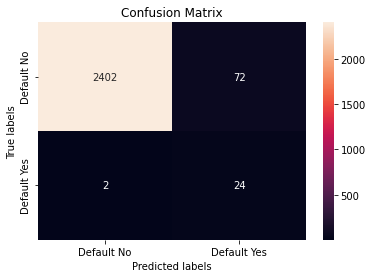

In [31]:
import seaborn as sns
ax= plt.subplot()

sns.heatmap(LDAtestcm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Default No', 'Default Yes'])
ax.yaxis.set_ticklabels(['Default No', 'Default Yes'])
plt.show()

### Plotting Confusion Matrix of Training Data as a Heatmap


[Text(0, 0.5, 'Default No'), Text(0, 1.5, 'Default Yes')]

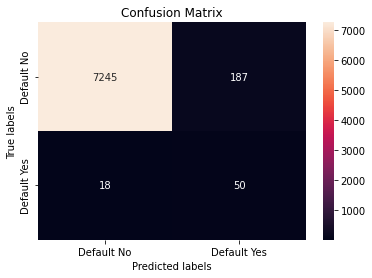

In [32]:
axx= plt.subplot()
sns.heatmap(LDAtraincm, annot=True, fmt='g', ax=axx)
axx.set_xlabel('Predicted labels')
axx.set_ylabel('True labels')
axx.set_title('Confusion Matrix')
axx.xaxis.set_ticklabels(['Default No', 'Default Yes'])
axx.yaxis.set_ticklabels(['Default No', 'Default Yes'])

In [33]:
LDAtrainaccuracy = np.trace(LDAtraincm)/np.sum(LDAtraincm)
LDAtestaccuracy = np.trace(LDAtestcm)/np.sum(LDAtestcm)

In [34]:
print('LDA Training Accuracy:', LDAtrainaccuracy*100,
'\b%\nLDA Testing Accuracy:',LDAtestaccuracy*100,'\b%')

LDA Training Accuracy: 97.26666666666667%
LDA Testing Accuracy: 97.04%


### Performing K fold Cross Validation to get better estimate of accuracy

In [35]:
# Testing with K-fold Validation to get a better accuracy score

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#

pipeline = make_pipeline(StandardScaler(),LDA())
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train[train, :], y_train[train])
    score = pipeline.score(X_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [6536  214], Accuracy: 0.976
Fold:  2, Training/Test Split Distribution: [6536  214], Accuracy: 0.975
Fold:  3, Training/Test Split Distribution: [6536  214], Accuracy: 0.976
Fold:  4, Training/Test Split Distribution: [6537  213], Accuracy: 0.967
Fold:  5, Training/Test Split Distribution: [6537  213], Accuracy: 0.980
Fold:  6, Training/Test Split Distribution: [6537  213], Accuracy: 0.972
Fold:  7, Training/Test Split Distribution: [6537  213], Accuracy: 0.971
Fold:  8, Training/Test Split Distribution: [6537  213], Accuracy: 0.968
Fold:  9, Training/Test Split Distribution: [6537  213], Accuracy: 0.971
Fold: 10, Training/Test Split Distribution: [6537  213], Accuracy: 0.972


Cross-Validation accuracy: 0.973 +/- 0.004


### Generating plots

In [36]:
def generate_line_plots(xlist1, ylist1, ylist2, xname,given_title):
  plt.title(given_title)#This command generates the title for the plot
  plt.plot(xlist1, ylist1, label = 'Train Data')# Plots the xlist1 vs ylist1
  plt.plot(xlist1, ylist2, label = 'Test Data', linestyle = '--')# Plots the
  # xlist1 vs ylist2 with dashed linestyle
  plt.ylabel('Accuracy')# label for the y axis
  plt.xlabel(xname) # label for the x axis
  plt.legend()# dislays the label for each plot on a legend
  plt.show()

### Decision Tree Model : Gini(Defalut Value) as Splitting Criteria

### Generating Plot Between Accuarcy and min_sample_split

[97.84, 97.72, 97.50666666666666, 97.09333333333333, 97.06666666666666]
[96.72, 96.88, 96.76, 97.04, 97.04]


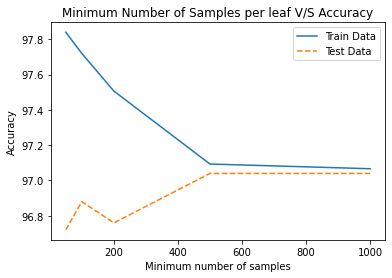

In [37]:
#Trainig Decsion Tree with entropy as criterion
from sklearn import tree
testscore=[]
trainscore=[]
# Experiment with various number of leaf samples
num_samples = [50,100,200,500,1000]
#Loop to check on which min_samples_split the best accuracy is found since the given data has large number of rows
for i in num_samples:
  # Step 1 : Create a decision tree classifier with minimum number of samples
  # per leaf
  classifier = tree.DecisionTreeClassifier(min_samples_split=i)
  # Step 2 : Learn the decision tree using the train set
  classifier.fit(X_train, y_train)
  # Step 3 : Compute test accuracy in %
  testscore.append(classifier.score(X_test,y_test)*100)
  # Step 4 : Compute train accuracy in %
  trainscore.append(classifier.score(X_train,y_train)*100)

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter
# varies
print(trainscore)
print(testscore)
generate_line_plots(num_samples,trainscore, testscore,"""Minimum number of samples""", 'Minimum Number of Samples per leaf V/S Accuracy')


Observations
1.   We can see here that when min_sapmle_split is 200 the test accuracy is really low but training accuarcy is high.
2.   Ideal min_sample_split will be 800 as here both training and testing accuracy converges.



### Maximum number of leaf nodes in the tree

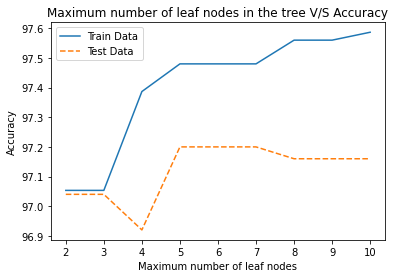

In [38]:
# Experiment with maximum number of leaf nodes
num_leaf_nodes = [i for i in range(2,11)]
# Please insert your code here
TrainScore = []
TestScore = []
for num in num_leaf_nodes:
  # Step 1 : Create a decision tree classifier with maximum number of leaf
  # nodes
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = num)
  # Step 2 : Learn the decision tree using the train set
  clf = clf.fit(X_train, y_train)
  # Step 3 : Compute train accuracy in %
  TrainScore.append(clf.score(X_train,y_train)*100)
  # Step 4 : Compute test accuracy in %
  TestScore.append(clf.score(X_test,y_test)*100)
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter
# varies
generate_line_plots(num_leaf_nodes, TrainScore, TestScore,"""Maximum number of leaf nodes""", 'Maximum number of leaf nodes in the tree V/S Accuracy')


Observationns:


1.   As Maximun number of leaf Nodes increases both testing and training accuracy increases
2.   We take 10 as ideal Maximum Number of leaf Nodes



### Maximum depth of the tree

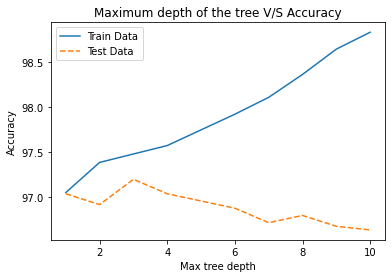

In [39]:
# Experiment with varied tree depths
tree_depths = [i for i in range(1,11)]
# Please insert your code here
TrainScore = []
TestScore = []
for depth in tree_depths:
  # Step 1 : Create a decision tree classifier with maximum tree depth
  clf = tree.DecisionTreeClassifier(max_depth = depth)
  # Step 2 : Learn the decision tree using the train set
  clf = clf.fit(X_train, y_train)
  # Step 3 : Compute train accuracy in %
  TrainScore.append(clf.score(X_train,y_train)*100)
  # Step 4 : Compute test accuracy in %
  TestScore.append(clf.score(X_test,y_test)*100)
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter
generate_line_plots(tree_depths, TrainScore, TestScore,'Max tree depth', 'Maximum depth of the tree V/S Accuracy')

Observations:


1.   As Max tree depth increases Accuarcy of both testing and training increases
2.   We take 10 as ideal max_depth



### Now visualising the Decision tree based on selected criterion

Confusion Matrix for test accuracy 
[[2386   18]
 [  56   40]]
Testing Classifier Score 0.9704


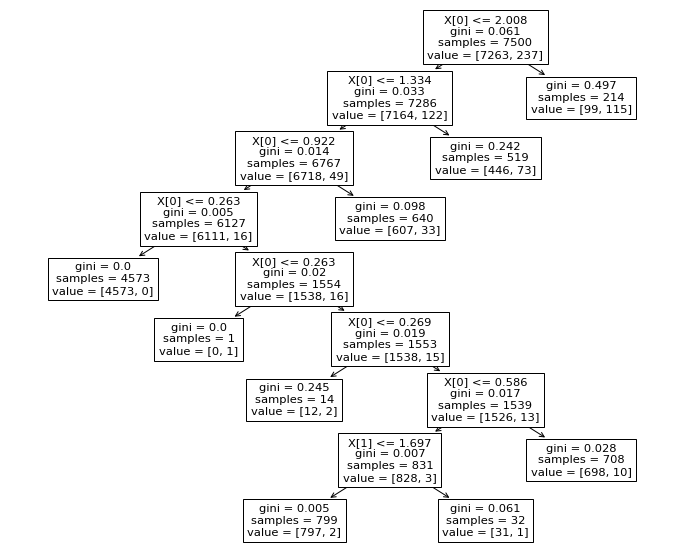

In [40]:
classifier=tree.DecisionTreeClassifier(min_samples_split=800,max_leaf_nodes =10,max_depth = 10)
classifier.fit(X_train, y_train)
plt.figure(figsize=(12,10))
tree.plot_tree(classifier)
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for test accuracy ')
print(cm)
print("Testing Classifier Score", classifier.score(X_test, y_test))

### Performing K fold Cross Validation to get better estimate of accuracy

In [41]:
# Testing with K-fold Validation to get a better accuracy score

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#

pipeline = make_pipeline(StandardScaler(),tree.DecisionTreeClassifier(min_samples_split=800,max_leaf_nodes =10,max_depth = 10))
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train[train, :], y_train[train])
    score = pipeline.score(X_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [6536  214], Accuracy: 0.972
Fold:  2, Training/Test Split Distribution: [6536  214], Accuracy: 0.965
Fold:  3, Training/Test Split Distribution: [6536  214], Accuracy: 0.976
Fold:  4, Training/Test Split Distribution: [6537  213], Accuracy: 0.960
Fold:  5, Training/Test Split Distribution: [6537  213], Accuracy: 0.972
Fold:  6, Training/Test Split Distribution: [6537  213], Accuracy: 0.972
Fold:  7, Training/Test Split Distribution: [6537  213], Accuracy: 0.976
Fold:  8, Training/Test Split Distribution: [6537  213], Accuracy: 0.971
Fold:  9, Training/Test Split Distribution: [6537  213], Accuracy: 0.968
Fold: 10, Training/Test Split Distribution: [6537  213], Accuracy: 0.971


Cross-Validation accuracy: 0.970 +/- 0.005


### Testing Confusion Matrix


[Text(0, 0.5, 'Default No'), Text(0, 1.5, 'Default Yes')]

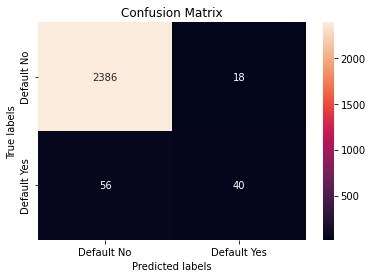

In [42]:
axx= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=axx)
axx.set_xlabel('Predicted labels')
axx.set_ylabel('True labels')
axx.set_title('Confusion Matrix')
axx.xaxis.set_ticklabels(['Default No', 'Default Yes'])
axx.yaxis.set_ticklabels(['Default No', 'Default Yes'])

Confusion Matrix for training data 
[[7164   99]
 [ 121  116]]
Trainig Classifier Score 0.9706666666666667


[Text(0, 0.5, 'Default No'), Text(0, 1.5, 'Default Yes')]

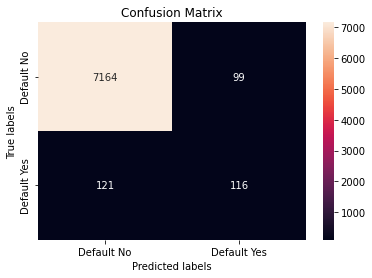

In [43]:
#trainig accuarcy
y_predtrain = classifier.predict(X_train)
cmtrain = confusion_matrix(y_train, y_predtrain)
print('Confusion Matrix for training data ')
print(cmtrain)
print("Trainig Classifier Score", classifier.score(X_train, y_train))
#Testing Confusion Matrix
axx= plt.subplot()
sns.heatmap(cmtrain, annot=True, fmt='g', ax=axx);
axx.set_xlabel('Predicted labels')
axx.set_ylabel('True labels')
axx.set_title('Confusion Matrix')
axx.xaxis.set_ticklabels(['Default No', 'Default Yes'])
axx.yaxis.set_ticklabels(['Default No', 'Default Yes'])

### Random Forest And plotting vconfusion matrix for Test Data

Random Forest Training Performance:
 [[7263    1]
 [   0  236]]
Random Forest Testing Performance:
 [[2393   65]
 [  11   31]]


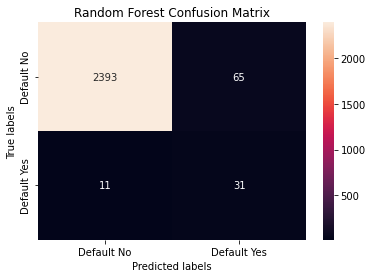

Random Forest Training Accuracy: 99.98666666666666 %
Random Forest Testing Accuracy: 96.96000000000001 %


Random Forest Cross-Validation accuracy: 0.969 +/- 0.005


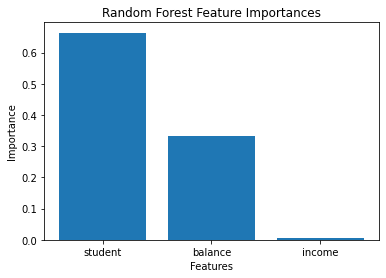

In [44]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions on Training and Test set
rf_train_predictions = rf_classifier.predict(X_train)
rf_test_predictions = rf_classifier.predict(X_test)

# Confusion Matrix for Training and Test set
rf_train_cm = confusion_matrix(rf_train_predictions, y_train)
rf_test_cm = confusion_matrix(rf_test_predictions, y_test)

# Printing Performance Metrics
print('Random Forest Training Performance:\n', rf_train_cm)
print('Random Forest Testing Performance:\n', rf_test_cm)

# Plotting Confusion Matrix for Test Data
ax = plt.subplot()
sns.heatmap(rf_test_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Default No', 'Default Yes'])
ax.yaxis.set_ticklabels(['Default No', 'Default Yes'])
plt.show()

# Accuracy Scores for Training and Test set
rf_train_accuracy = np.trace(rf_train_cm) / np.sum(rf_train_cm)
rf_test_accuracy = np.trace(rf_test_cm) / np.sum(rf_test_cm)
print('Random Forest Training Accuracy:', rf_train_accuracy * 100, '%')
print('Random Forest Testing Accuracy:', rf_test_accuracy * 100, '%')

# Cross-Validation for Random Forest
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=0))

rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=strtfdKFold)
print('\n\nRandom Forest Cross-Validation accuracy: %.3f +/- %.3f' % (np.mean(rf_scores), np.std(rf_scores)))

# Plotting Feature Importances
feature_importances = rf_classifier.feature_importances_
plt.bar(columns[1:4], feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


### Predictions on Training set for Random Forest and plotting COnfusion Matrix for Training

Random Forest Training Performance:
 [[7263    1]
 [   0  236]]


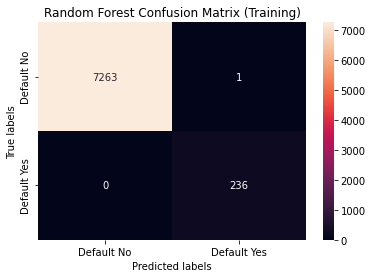

Random Forest Training Accuracy: 99.98666666666666 %


In [45]:
rf_train_predictions = rf_classifier.predict(X_train)

# Confusion Matrix for Training set
rf_train_cm = confusion_matrix(rf_train_predictions, y_train)

# Printing Performance Metrics for Training set
print('Random Forest Training Performance:\n', rf_train_cm)

# Plotting Confusion Matrix for Training Data
ax_train = plt.subplot()
sns.heatmap(rf_train_cm, annot=True, fmt='g', ax=ax_train)
ax_train.set_xlabel('Predicted labels')
ax_train.set_ylabel('True labels')
ax_train.set_title('Random Forest Confusion Matrix (Training)')
ax_train.xaxis.set_ticklabels(['Default No', 'Default Yes'])
ax_train.yaxis.set_ticklabels(['Default No', 'Default Yes'])
plt.show()

# Accuracy Score for Training set
rf_train_accuracy = np.trace(rf_train_cm) / np.sum(rf_train_cm)
print('Random Forest Training Accuracy:', rf_train_accuracy * 100, '%')


### KNN Training the Model and Predicting on Train and Test Dataset Plotting Confusion Matrix for Test Data and Accuracy Score for Training and Test Set


KNN Training Performance:
 [[7226  147]
 [  37   90]]
KNN Testing Performance:
 [[2389   65]
 [  15   31]]





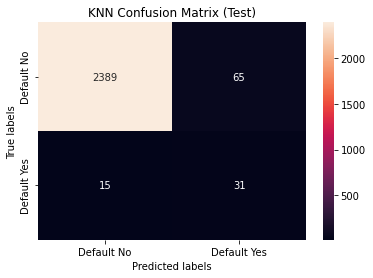

KNN Training Accuracy: 97.54666666666667 %
KNN Testing Accuracy: 96.8 %


In [46]:
# Importing k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Training KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predictions on Training and Test set
knn_train_predictions = knn_classifier.predict(X_train)
knn_test_predictions = knn_classifier.predict(X_test)

# Confusion Matrix for Training and Test set
knn_train_cm = confusion_matrix(knn_train_predictions, y_train)
knn_test_cm = confusion_matrix(knn_test_predictions, y_test)

# Printing Performance Metrics
print('KNN Training Performance:\n', knn_train_cm)
print('KNN Testing Performance:\n', knn_test_cm)
print('\n\n')
# Plotting Confusion Matrix for Test Data
ax_knn_test = plt.subplot()
sns.heatmap(knn_test_cm, annot=True, fmt='g', ax=ax_knn_test)
ax_knn_test.set_xlabel('Predicted labels')
ax_knn_test.set_ylabel('True labels')
ax_knn_test.set_title('KNN Confusion Matrix (Test)')
ax_knn_test.xaxis.set_ticklabels(['Default No', 'Default Yes'])
ax_knn_test.yaxis.set_ticklabels(['Default No', 'Default Yes'])
plt.show()

# Accuracy Scores for Training and Test set
knn_train_accuracy = np.trace(knn_train_cm) / np.sum(knn_train_cm)
knn_test_accuracy = np.trace(knn_test_cm) / np.sum(knn_test_cm)
print('KNN Training Accuracy:', knn_train_accuracy * 100, '%')
print('KNN Testing Accuracy:', knn_test_accuracy * 100, '%')



### Cross-Validation for KNN




KNN Cross-Validation accuracy: 0.970 +/- 0.004


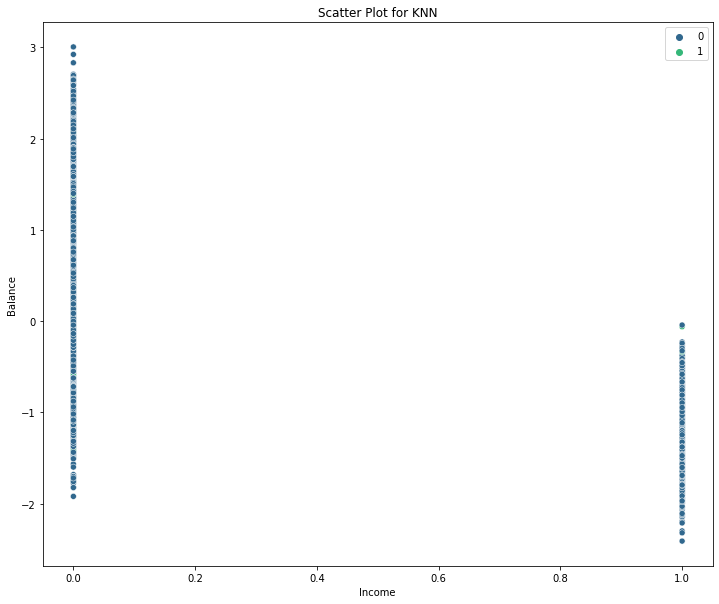

In [47]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=strtfdKFold)
print('\n\nKNN Cross-Validation accuracy: %.3f +/- %.3f' % (np.mean(knn_scores), np.std(knn_scores)))

# Scatter Plot for KNN
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_train[:, 2], y=X_train[:, 1], hue=y_train, palette='viridis')
plt.title('Scatter Plot for KNN')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()


### Comparing LDA, Decision Tree Models, Random Forest and KNN

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
lda_pred_prob = LDAclassifier.predict_proba(X_test)[:, 1]
rf_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
knn_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]
dt_pred_prob = classifier.predict_proba(X_test)[:, 1]

### ROC curve for models


In [52]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_pred_prob, pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob, pos_label=1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pred_prob, pos_label=1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_prob, pos_label=1)


In [53]:
auc_lda = roc_auc_score(y_test, lda_pred_prob)
auc_rf = roc_auc_score(y_test, rf_pred_prob)
auc_knn = roc_auc_score(y_test, knn_pred_prob)
auc_dt = roc_auc_score(y_test, dt_pred_prob)


### Plot ROC curves


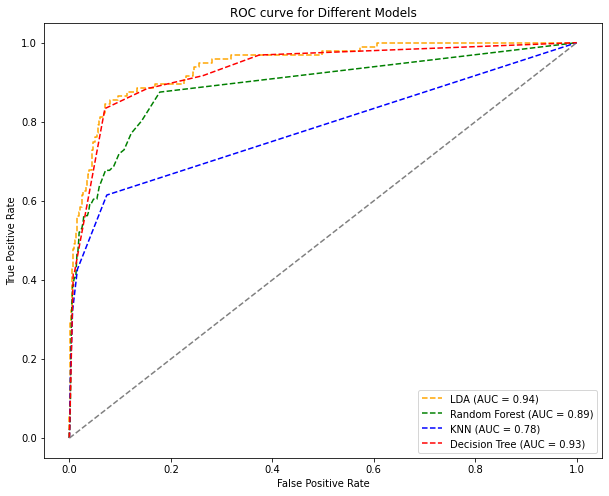

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lda, tpr_lda, linestyle='--', color='orange', label='LDA (AUC = {:.2f})'.format(auc_lda))
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='green', label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn, linestyle='--', color='blue', label='KNN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_dt, tpr_dt, linestyle='--', color='red', label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC curve for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


#  Problem Statement 2

# Use PCA and SVD to reduce the dimensions of the data 2 so that the reduced data has 5, 10, 15 and 20 columns. Give an exploratory data analysis on  SVS with 5 columns.

In [55]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
df = pd.read_csv('Data/HD Data 2.csv')

In [58]:
df

Unnamed: 0          1          2          3          4          5  \
0              0  40.527005  23.827908  70.151381  25.402995  51.205610   
1              1  16.131192   3.417445  -4.161446  44.970951   9.048227   
2              2  31.711781   1.921228  34.673047  50.258594  80.429873   
3              3  22.344608  17.654925  -7.462117  11.181247   9.024700   
4              4   1.463305  70.867143  26.463260  35.616958  11.806956   
...          ...        ...        ...        ...        ...        ...   
2495        2495  -1.141026  -1.017415  10.463158   2.887700  17.035051   
2496        2496  58.287081  20.095938   2.865355  52.423177  -1.039915   
2497        2497  -3.548954  16.754013  12.868025  42.600501  10.188366   
2498        2498  53.577562  20.097276  40.282856   8.647917  16.646555   
2499        2499  27.049408   7.280802  43.067183   6.048532  61.661639   

              6          7          8          9  ...         41          42  \
0     -0.500565  14.055124  34.628477   9.124017  ...  18.064201    9.432148   
1      1.652619   6.938698  15.127169  -6.665835  ...  24.769010  101.715152   
2      0.171150  16.645188  33.591276  10.008848  ...  24.733085   12.553875   
3     43.636999   5.731934  62.434215  34.540465  ...  13.562030   10.719871   
4     35.414390  22.295906  27.546526  10.187778  ...  13.428348   45.668807   
...         ...        ...        ...        ...  ...        ...         ...   
2495   4.059348  49.155453   9.383939  11.090642  ...   3.276487   15.801198   
2496  17.328451   6.973377  30.851782  19.193449  ...  -1.027688   51.109309   
2497   9.905352   2.521764  -2.002795   1.538263  ...  23.128603   -3.803400   
2498  19.588062  61.227117  10.292142  29.436988  ...  24.711134   36.485876   
2499   8.190058  22.041664  15.934858   4.444227  ...  18.668000   10.350884   

             43         44         45         46         47         48  \
0      2.504029   0.269358  19.952375   7.455010   9.459746  39.861311   
1     -1.039992  18.389691   4.058942   9.340447   8.972296   7.967516   
2     13.120951  34.285047  41.687390  50.279687  24.313796   4.485158   
3      0.473489   1.153721  14.223376  28.148071  -3.480725  49.718266   
4     23.522061  56.072090   3.727361   7.822075  19.567931  13.023900   
...         ...        ...        ...        ...        ...        ...   
2495  86.279789  27.326991  18.040121  22.151473  75.854007  37.193650   
2496  58.342683  27.669227  38.860496  73.064009  35.407761  38.432561   
2497  21.272966  40.937706  16.283572  43.449431  11.659081  86.987480   
2498   9.940823   7.379581  14.054125  17.712843  -3.330291  50.057037   
2499  48.764519  -1.566271  24.815107   0.416476   3.837631   7.054202   

             49         50  
0      6.326133  20.627744  
1      5.644450  31.050950  
2     -8.039312  30.973228  
3     36.347201   8.920897  
4     10.670013  17.301297  
...         ...        ...  
2495  29.466767  24.558372  
2496  41.889405  15.256207  
2497  16.044745   5.368698  
2498   8.968517  32.313652  
2499  82.843595  41.563674  

[2500 rows x 51 columns]

### Apply PCA with different dimensions


In [59]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df)

dimensions = [5, 10, 15, 20]

for dim in dimensions:
    pca = PCA(n_components=dim)
    pca_result = pca.fit_transform(X_imputed)
    print(f"PCA with {dim} columns:")
    print(pca_result)
    print("\n")

PCA with 5 columns:
[[ 1249.6354379     14.62679069     4.09665835   -22.23712987
      2.55762134]
 [ 1248.61433583    -7.28255996    -2.27028556   -27.73977736
    -15.00301681]
 [ 1247.6250026     47.95581006   -14.39561936    21.20121321
     22.87879711]
 ...
 [-1247.50660175   -14.58958082   -38.49726715     4.90089099
    -10.44289839]
 [-1248.47497842     7.64649169    26.91196557    30.94034906
     39.25189072]
 [-1249.51589957   -29.42654897    29.14365085    -8.99570529
     -2.80160341]]


PCA with 10 columns:
[[ 1.24963544e+03 -3.70417656e+00 -4.60792640e+00 ...  1.79343237e+01
  -5.32514017e+00 -6.59720518e+00]
 [ 1.24861434e+03 -1.45498445e+01  1.61851305e+00 ...  4.06703467e+01
  -7.61781413e+00  8.71424079e+00]
 [ 1.24762500e+03  4.37665405e+01 -1.38526093e+01 ...  7.81723865e+00
  -3.65012134e+01 -1.88919241e+01]
 ...
 [-1.24750660e+03 -7.51486845e+00  5.16679786e+00 ... -8.18292150e+00
  -2.01106103e+01  7.83587484e-01]
 [-1.24847498e+03  4.69168839e-01 -7.41376191e

### Apply SVD with different dimensions Printing results for each dimension with Summanry Statics and Histogram for the first component

### Also calculating the correlation matrix for SVD columns and Plotting the heatmap for SVD



Results for SVD with 5 columns:
Shape of SVD result: (2500, 5)

Summary Statistics:
       Component_0  Component_1  Component_2  Component_3  Component_4
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean   1249.500582    19.376107    20.018453    20.289183    20.161816
std     721.831147     5.778854     6.498541     6.802788     9.085621
min      -0.107621     2.895804    -5.641592    -0.271409   -25.351322
25%     624.780222    15.390903    15.518247    15.641033    14.245183
50%    1249.508600    19.049057    19.619961    19.913724    19.870859
75%    1874.147845    22.795711    24.087598    24.310945    25.658667
max    2498.898256    49.885642    46.509324    52.386045    61.422459




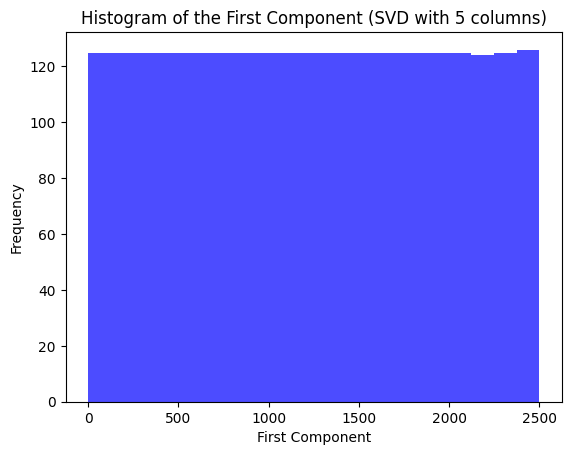

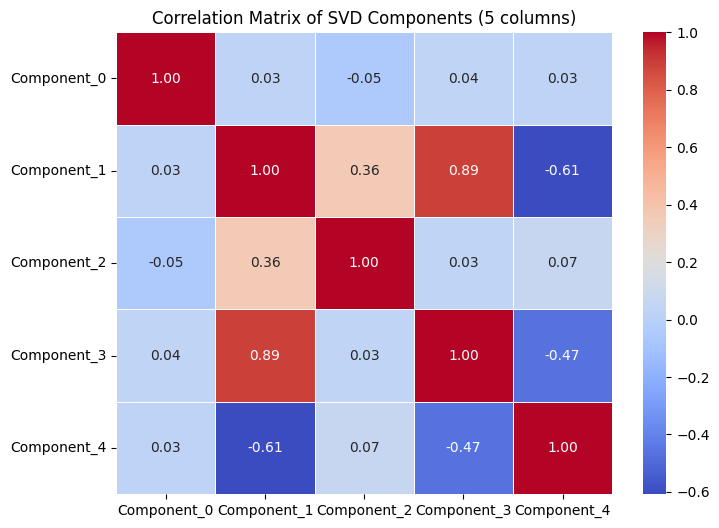


Results for SVD with 10 columns:
Shape of SVD result: (2500, 10)

Summary Statistics:
       Component_0  Component_1  Component_2  Component_3  Component_4  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean   1249.500456    19.362105    20.048496    20.255322    20.219157   
std     721.831367     8.262885    10.183121     9.714704    12.534472   
min      -0.099587    -2.584097   -18.005276   -13.127686   -21.992499   
25%     624.756604    13.507997    13.085167    13.642544    12.034954   
50%    1249.514280    18.714021    19.886262    19.460963    19.751140   
75%    1874.183501    24.336077    26.386236    26.262264    27.805751   
max    2498.868971    61.185374    62.327839    66.187619    74.779137   

       Component_5  Component_6  Component_7  Component_8  Component_9  
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  
mean     20.073102    19.989208    19.374853    19.694826    20.081672  
std       5.466533     4.15

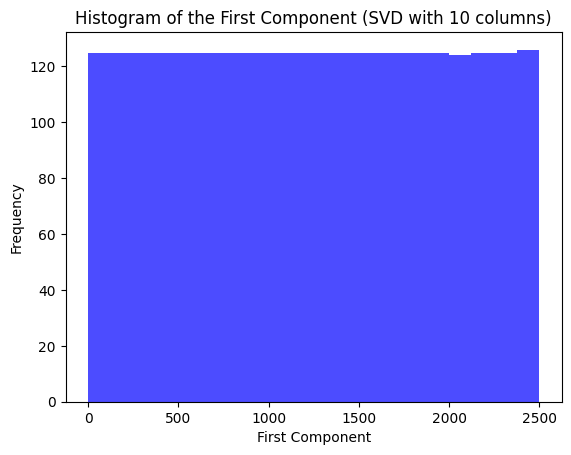

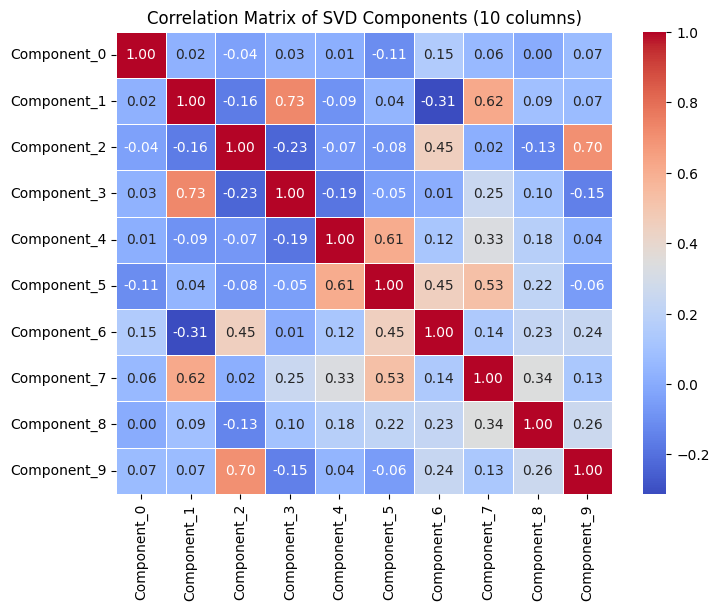


Results for SVD with 15 columns:
Shape of SVD result: (2500, 15)

Summary Statistics:
       Component_0  Component_1  Component_2  Component_3  Component_4  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean   1249.500385    19.376905    20.054363    20.264872    20.277162   
std     721.831490     9.975101    11.959760    11.246579    16.587945   
min      -0.043961   -11.595658   -26.680002   -14.957986   -24.510459   
25%     624.768823    12.529176    11.936389    12.690706     9.031574   
50%    1249.496951    18.675165    19.322628    19.495912    18.408310   
75%    1874.151466    25.366463    27.245092    26.849803    29.181456   
max    2498.909282    68.071510    84.590459    72.670185    98.154678   

       Component_5  Component_6  Component_7  Component_8  Component_9  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     20.079524    20.001612    19.380931    19.666404    20.082035   
std      10.616588    10

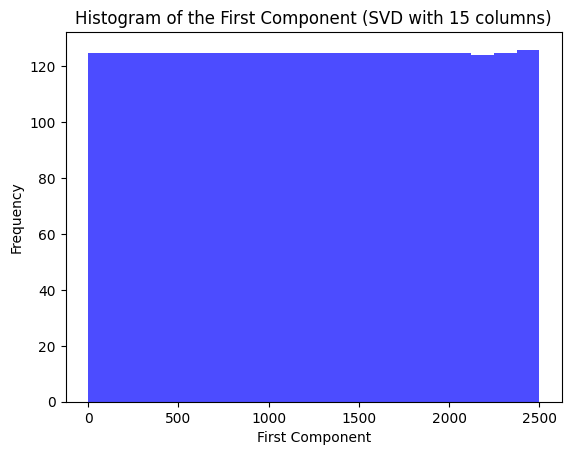

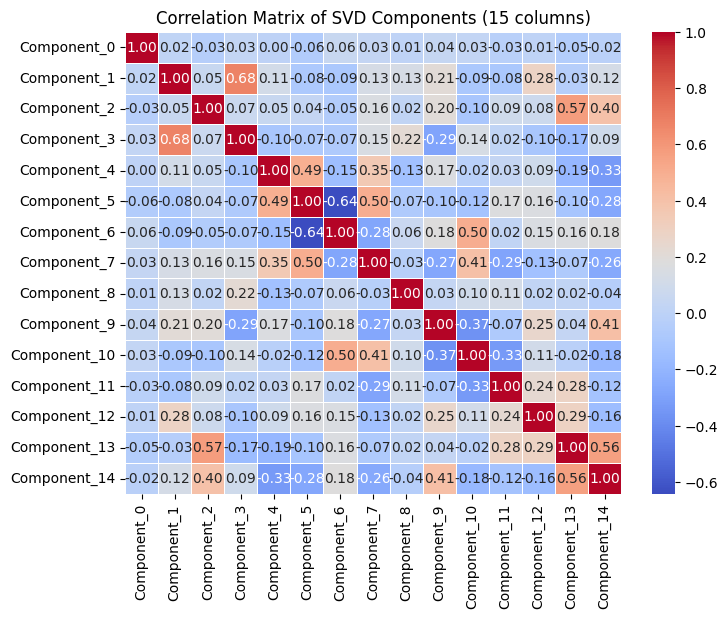


Results for SVD with 20 columns:
Shape of SVD result: (2500, 20)

Summary Statistics:
       Component_0  Component_1  Component_2  Component_3  Component_4  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean   1249.500304    19.379138    20.078375    20.266952    20.299275   
std     721.831631    10.667056    13.019493    12.231410    17.283520   
min      -0.032792   -12.803323   -30.862191   -12.146513   -26.620775   
25%     624.743427    11.992970    11.572646    12.141740     8.472292   
50%    1249.493225    18.581461    19.311537    19.213296    18.093342   
75%    1874.144438    25.830774    27.903719    27.357796    29.372151   
max    2498.928371    72.195939    93.537918    77.013962   111.202343   

       Component_5  Component_6  Component_7  Component_8  Component_9  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     20.074912    20.028133    19.361522    19.653843    20.062332   
std      12.458216    13

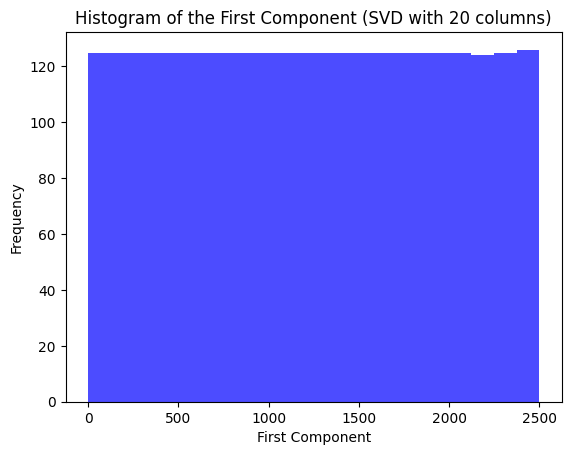

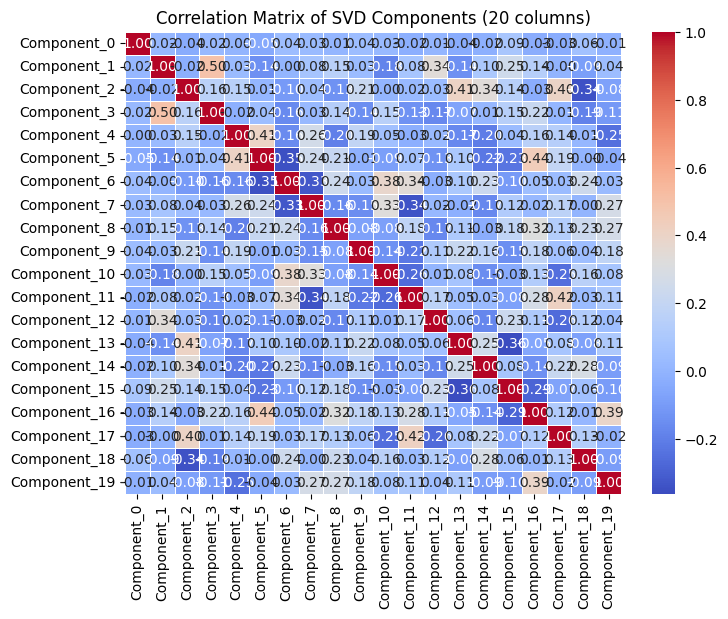

In [ ]:
# Dictionary to store SVD results for each dimension
svd_results = {}

for dim in dimensions:
    # Perform SVD
    u, s, vt = np.linalg.svd(X_imputed, full_matrices=False)
    svd_result = np.dot(u[:, :dim], np.diag(s[:dim])).dot(vt[:dim, :])
    svd_results[dim] = svd_result

    # Create a new DataFrame with the reduced number of columns
    svd_df = pd.DataFrame(svd_result[:, :dim], columns=[f'Component_{i}' for i in range(dim)])

    # Print results for each dimension
    print(f"\nResults for SVD with {dim} columns:")
    print(f"Shape of SVD result: {svd_df.shape}")

    # Example: Summary statistics
    print("\nSummary Statistics:")
    print(svd_df.describe())
    print('\n')

    # Example: Histogram for the first component
    plt.hist(svd_df['Component_0'], bins=20, color='blue', alpha=0.7)
    plt.xlabel('First Component')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of the First Component (SVD with {dim} columns)')
    plt.show()
    print('\n')
    # Calculate the correlation matrix for SVD with 5 columns
    correlation_matrix_svd = svd_df.corr()

    # Plot the heatmap for SVD with 5 columns
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_svd, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix of SVD Components ({dim} columns)')
    plt.show()


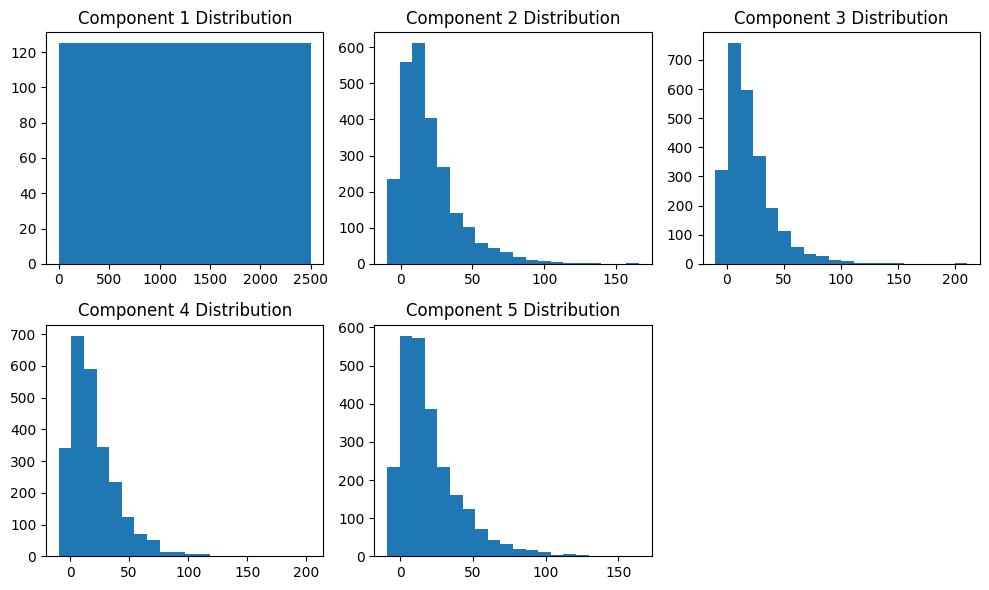

In [ ]:
# Histograms or density plots for each component
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.hist(df.iloc[:, i], bins=20)
    plt.title(f'Component {i+1} Distribution')
plt.tight_layout()
plt.show()


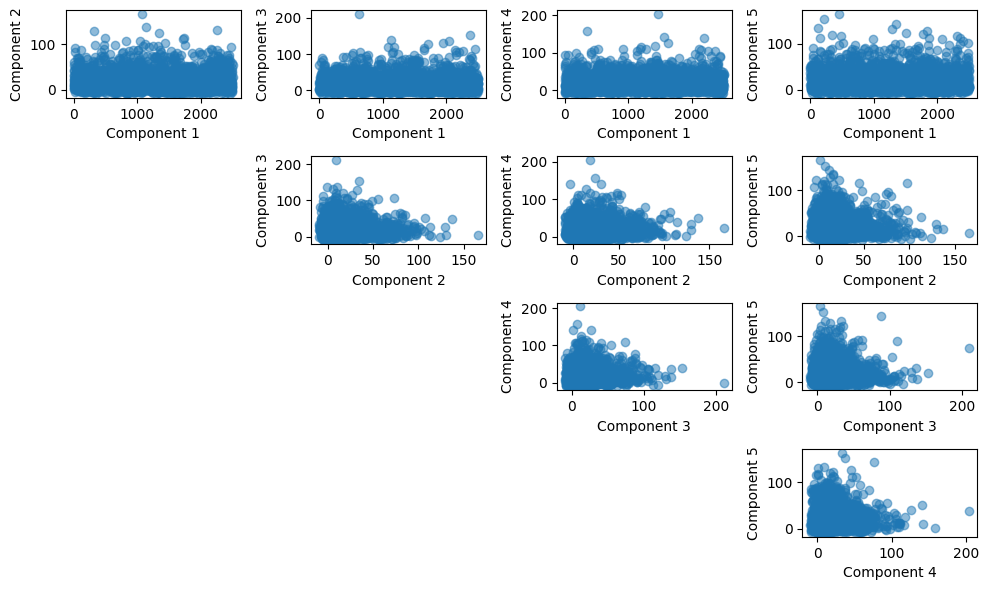

In [ ]:
# Pairwise scatter plots
plt.figure(figsize=(10, 6))
for i in range(4):
    for j in range(i+1, 5):
        plt.subplot(4, 4, i*4+j)
        plt.scatter(df.iloc[:, i], df.iloc[:, j], alpha=0.5)
        plt.xlabel(f'Component {i+1}')
        plt.ylabel(f'Component {j+1}')
plt.tight_layout()
plt.show()


#  Problem Statement 3

# Use linear regression and LDA on data 3 to predict whether a given suburb has a crime rate above or below the median. Compare the findings from different methods.




# Exploratory Data Analysis


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
# Loading the dataset
file_path = 'Data/Boston.csv'
data = pd.read_csv(file_path)

In [8]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [9]:
# Summary of numerical columns
print("\nSummary of numerical columns:")
print(data.describe())


Summary of numerical columns:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032

In [10]:
# Information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [11]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64



Distribution of numerical features:


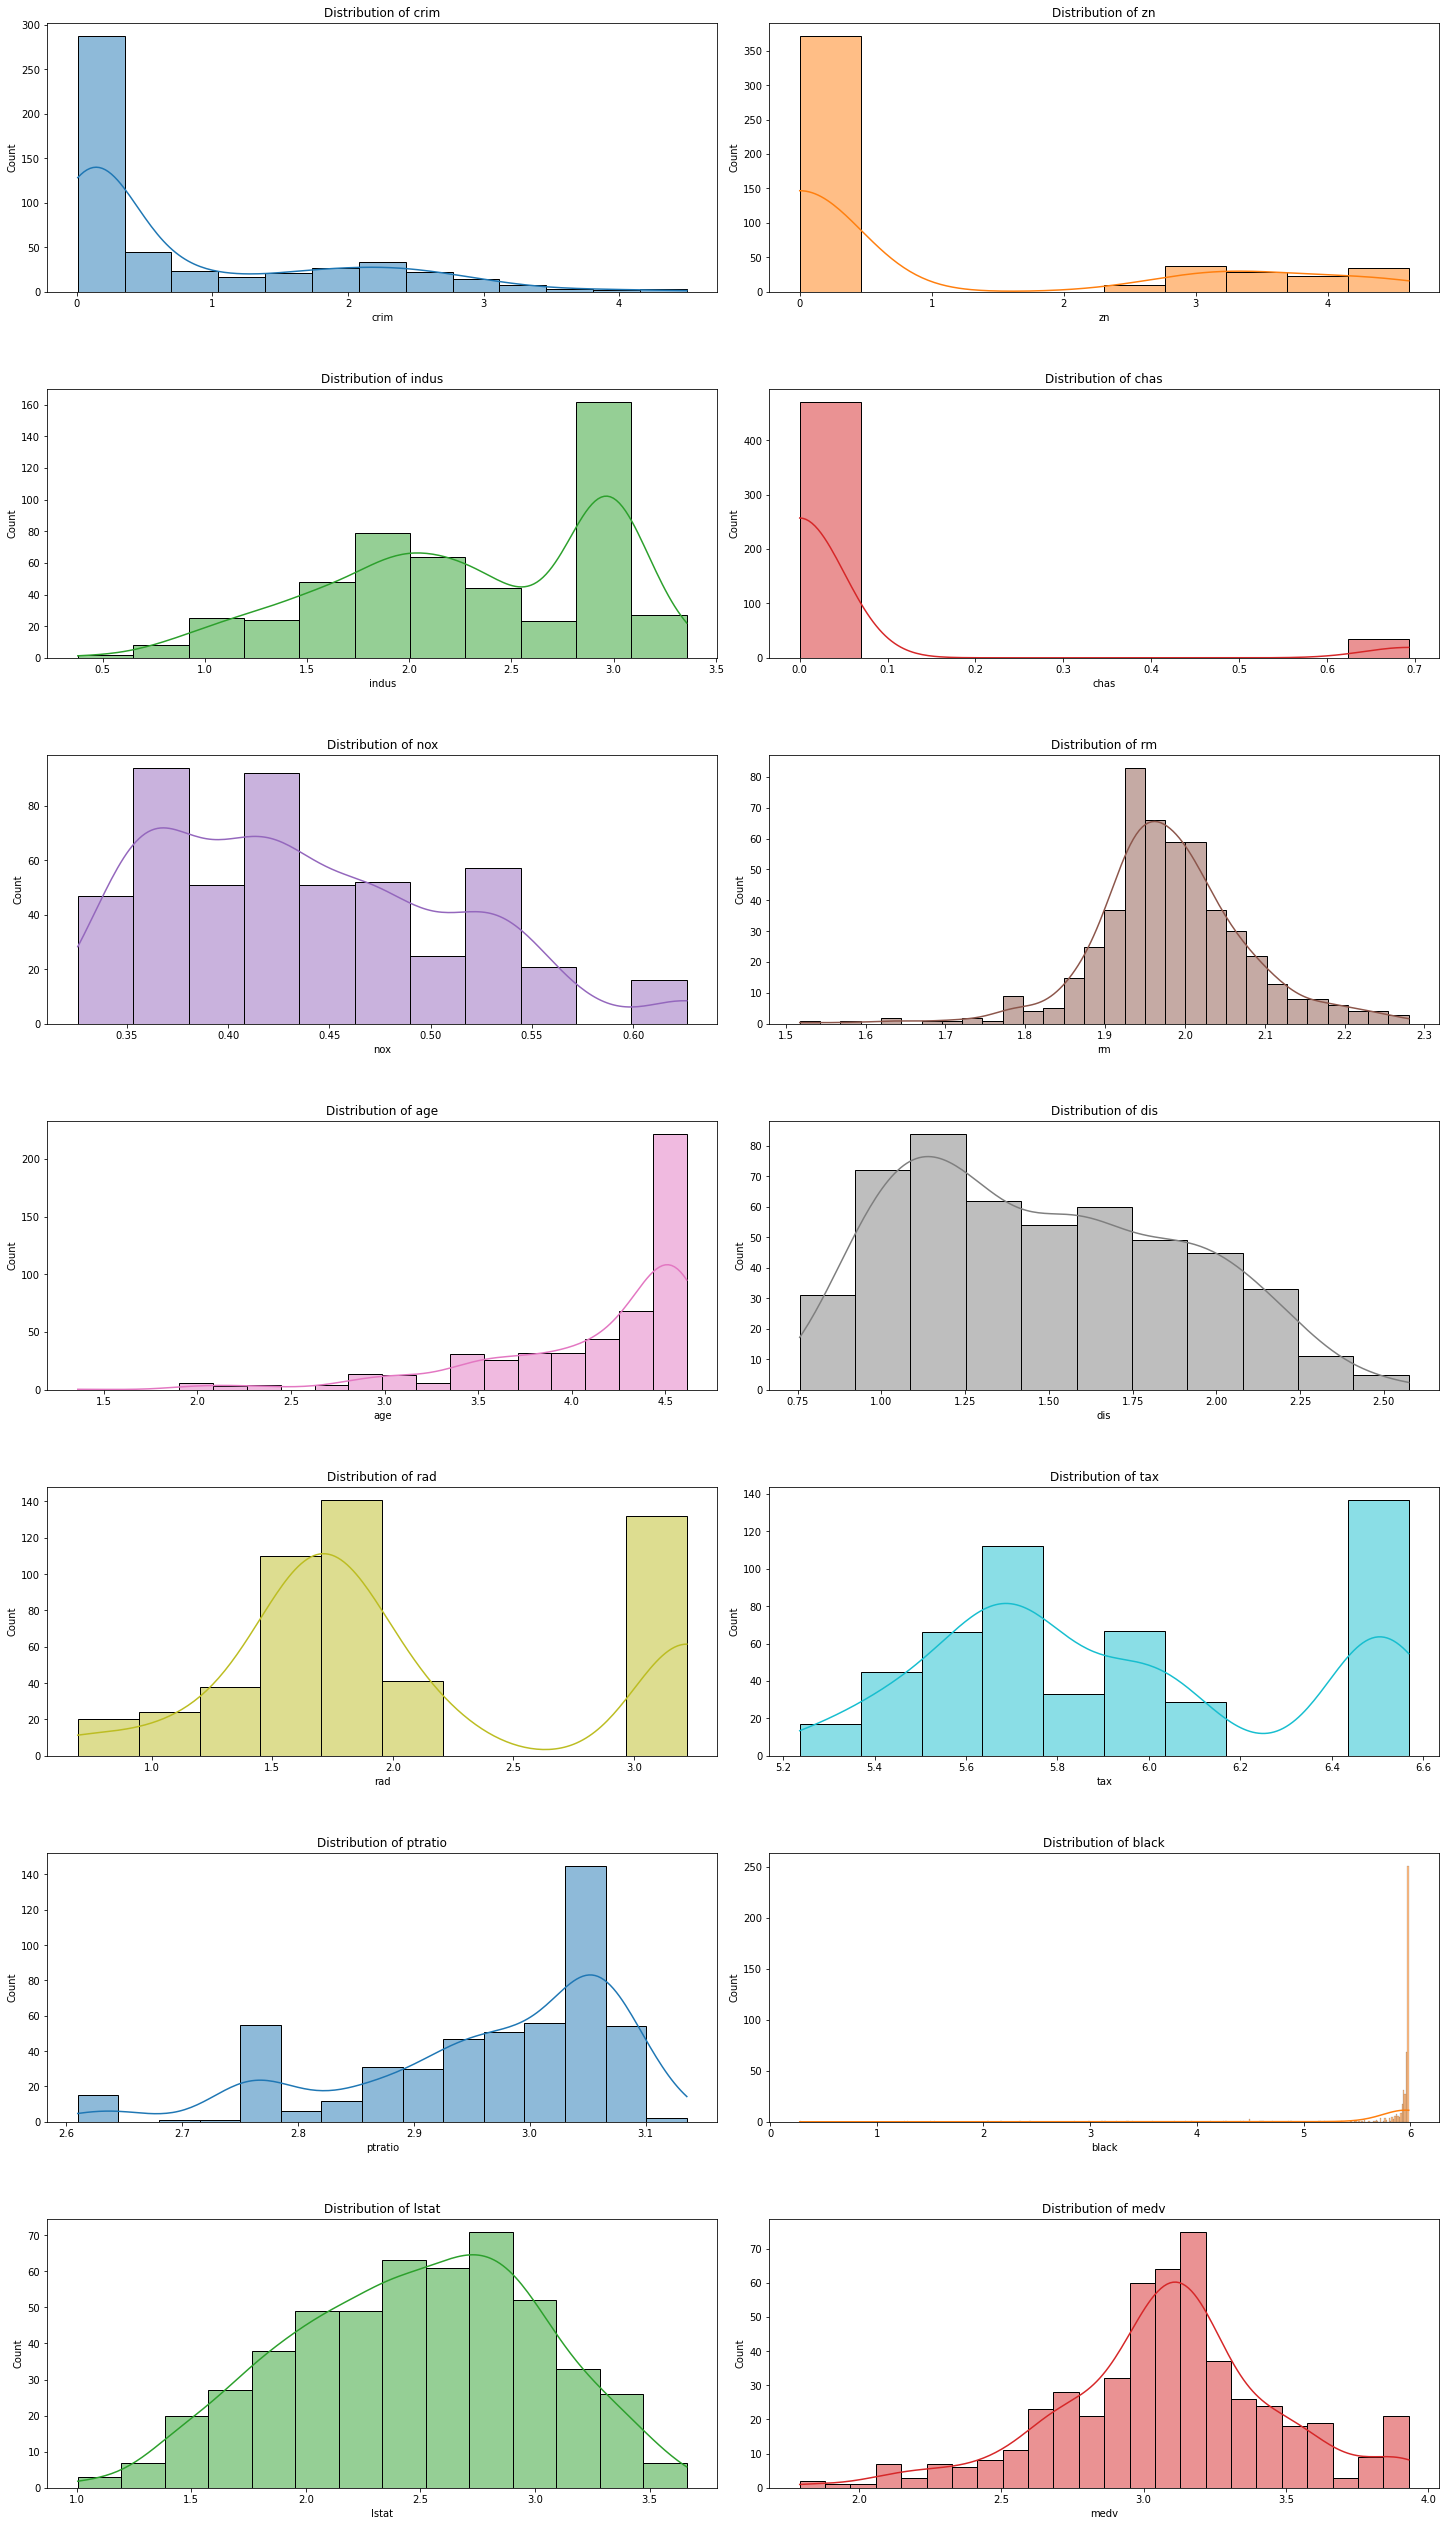

In [12]:
# Plotting histograms for Distribution of numerical features
print("\nDistribution of numerical features:")
color_palette = sns.color_palette("tab10")
columns = data.select_dtypes(include='number').columns
num_cols = len(columns)
num_rows = (num_cols // 2) + (num_cols % 2)  # Calculate the number of rows needed
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 5 * num_rows))
axs = axs.flatten()

# Plotting histograms
for i, column in enumerate(columns):
    ax = axs[i]
    sns.histplot(data[column].apply(lambda x: np.log1p(x)), ax=ax, kde=True, color=color_palette[i % 10])
    ax.set_title(f'Distribution of {column}')

# Removing empty subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


Correlation matrix:


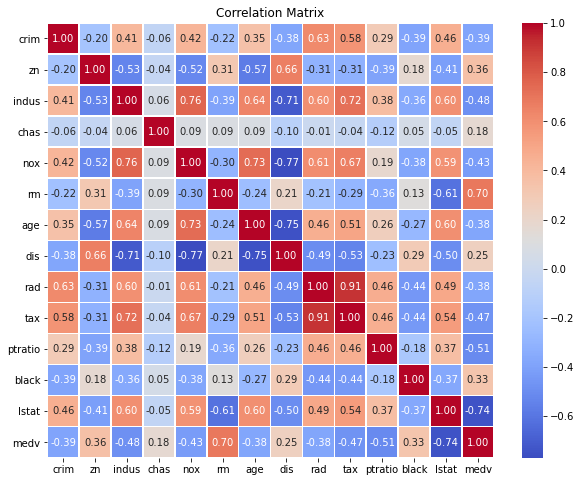

In [13]:
# Poltting Correlation matrix using Heatmap
print("\nCorrelation matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [15]:
#Correlation Matrix in Data form
data.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     black     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
black    0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

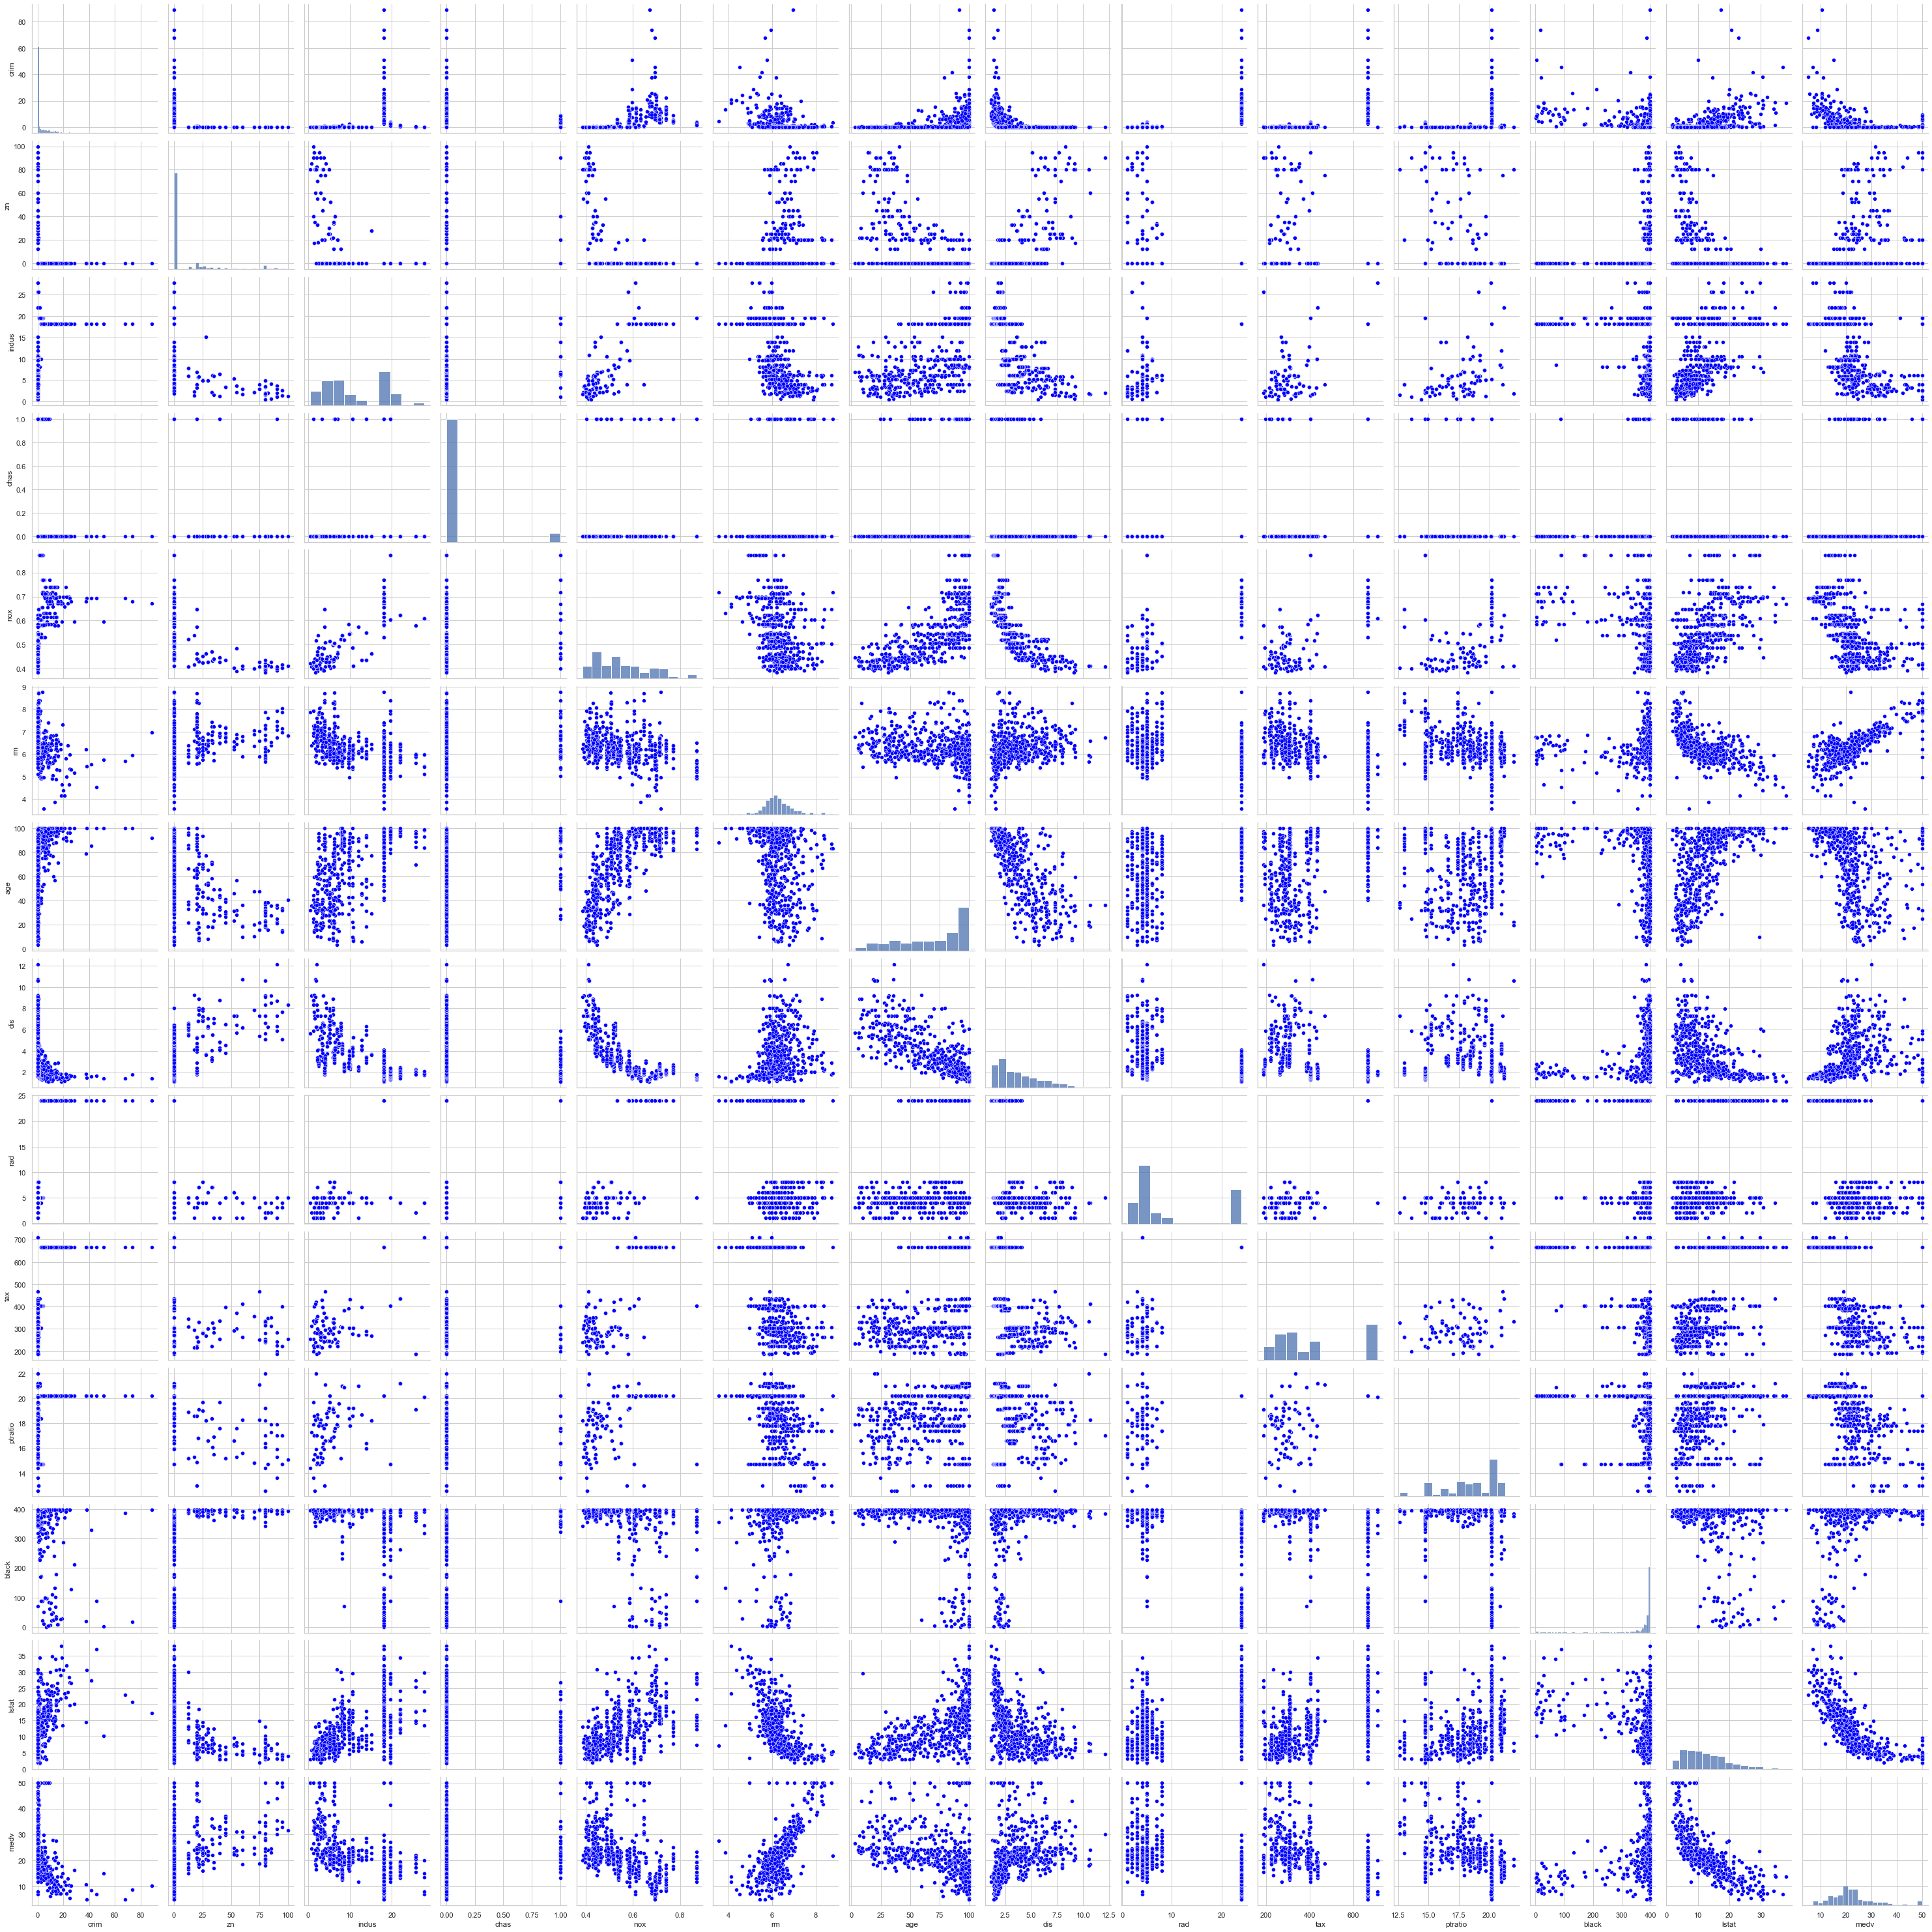

In [16]:
#Pairplots for all features
sns.set(style="whitegrid")
sns.pairplot(data, plot_kws={'color': 'blue'}, palette='viridis', height=3)
plt.show()

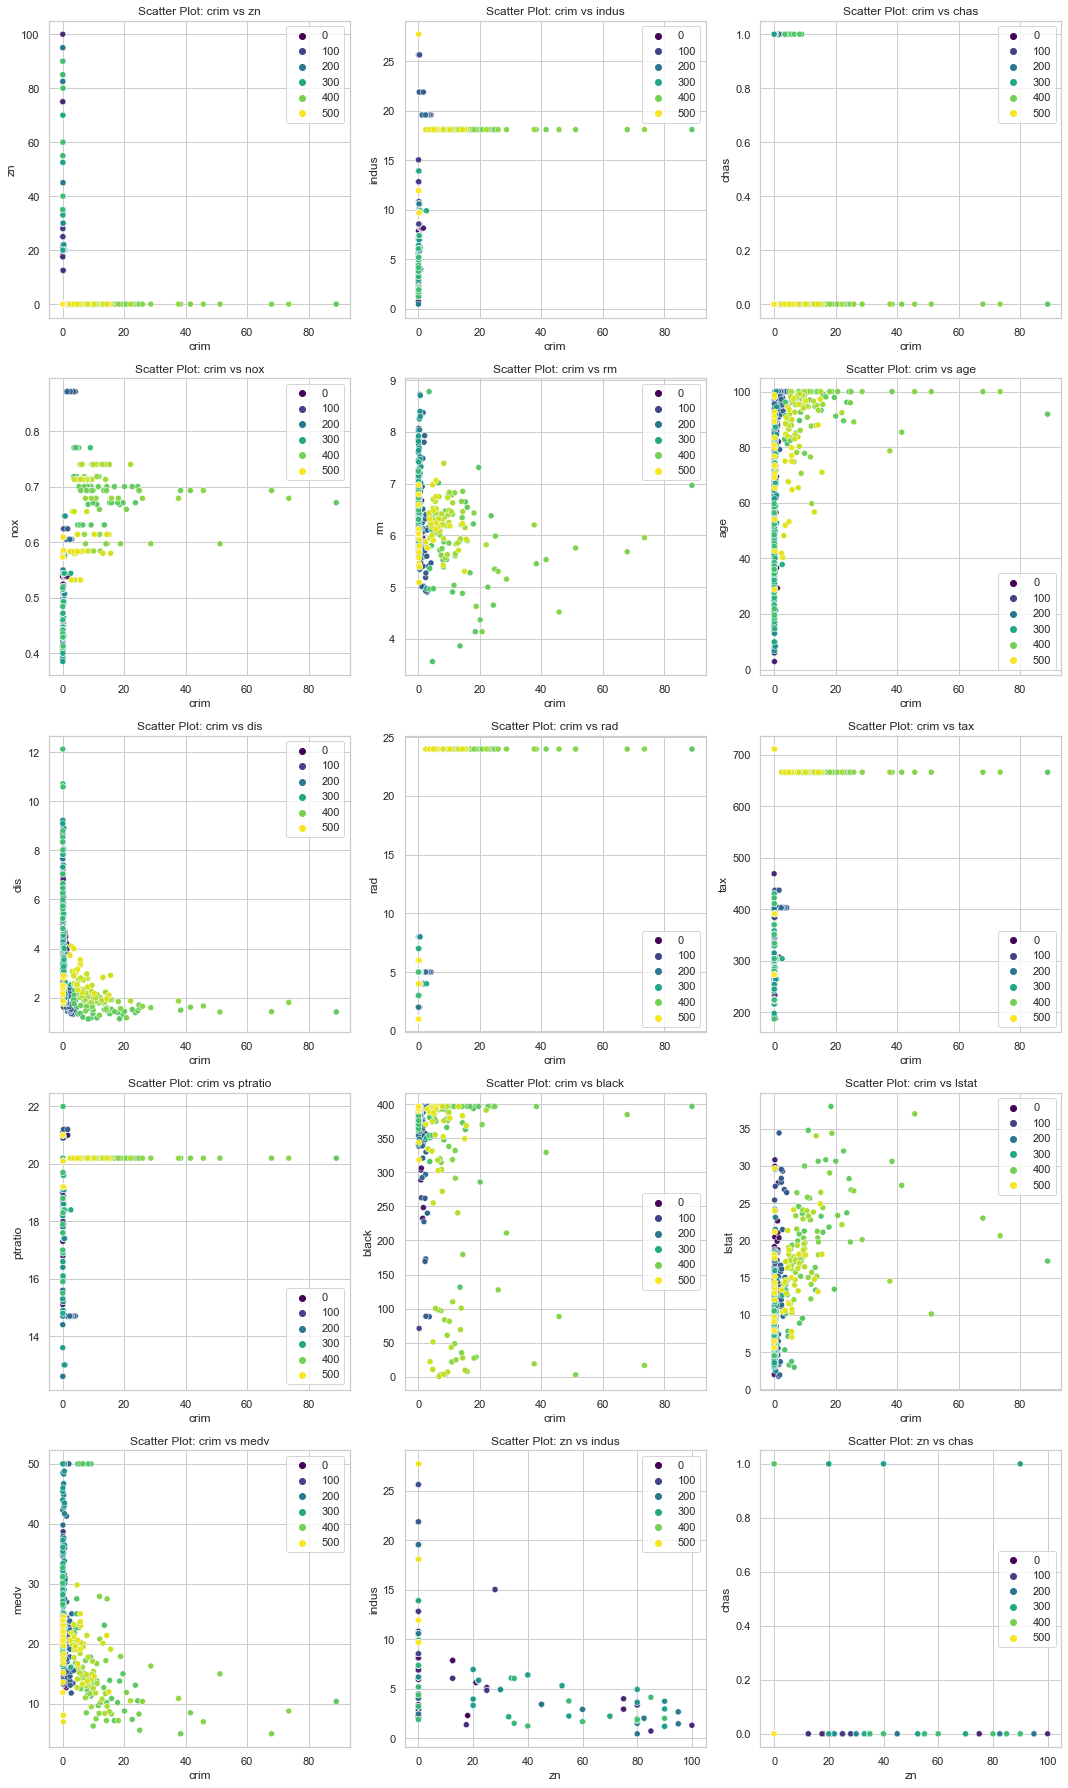

In [17]:
#Scatterplot for crime rate with all features
columns = data.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), sharex=False, sharey=False)
axes = axes.flatten()
subplot_index = 0
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j and subplot_index < len(axes):
            sns.scatterplot(x=data[col1], y=data[col2], hue=data.index, palette='viridis', ax=axes[subplot_index])
            axes[subplot_index].set_xlabel(col1)
            axes[subplot_index].set_ylabel(col2)
            axes[subplot_index].set_title(f'Scatter Plot: {col1} vs {col2}')
            subplot_index += 1
            
for i in range(subplot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Outliers Detection


In [18]:
# Detecting outliers using IQR method
def detect_outliers(df, columns, remove_outliers=False):
    outliers = pd.DataFrame()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])

        if remove_outliers:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    outliers = outliers.drop_duplicates()
    return outliers

numerical_columns = data.select_dtypes(include='number').columns

outliers = detect_outliers(data, numerical_columns, remove_outliers=False)

print("Detected Outliers:")
print(outliers)

Detected Outliers:
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.52220  0.0  18.10     0  0.631  3.863  100.0  1.5106   24  666   
371   9.23230  0.0  18.10     0  0.631  6.216  100.0  1.1691   24  666   
373  11.10810  0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666   
374  18.49820  0.0  18.10     0  0.668  4.138  100.0  1.1370   24  666   
375  19.60910  0.0  18.10     0  0.671  7.313   97.9  1.3163   24  666   
..        ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
161   1.46336  0.0  19.58     0  0.605  7.489   90.8  1.9709    5  403   
179   0.05780  0.0   2.46     0  0.488  6.980   58.4  2.8290    3  193   
182   0.09103  0.0   2.46     0  0.488  7.155   92.2  2.7006    3  193   
228   0.29819  0.0   6.20     0  0.504  7.686   17.0  3.3751    8  307   
368   4.89822  0.0  18.10     0  0.631  4.970  100.0  1.3325   24  666   

     ptratio   black  lstat  medv  
367     20.2  131.42  13.33  23.1  
371     20.2  366.15

Boxplot for all features: 



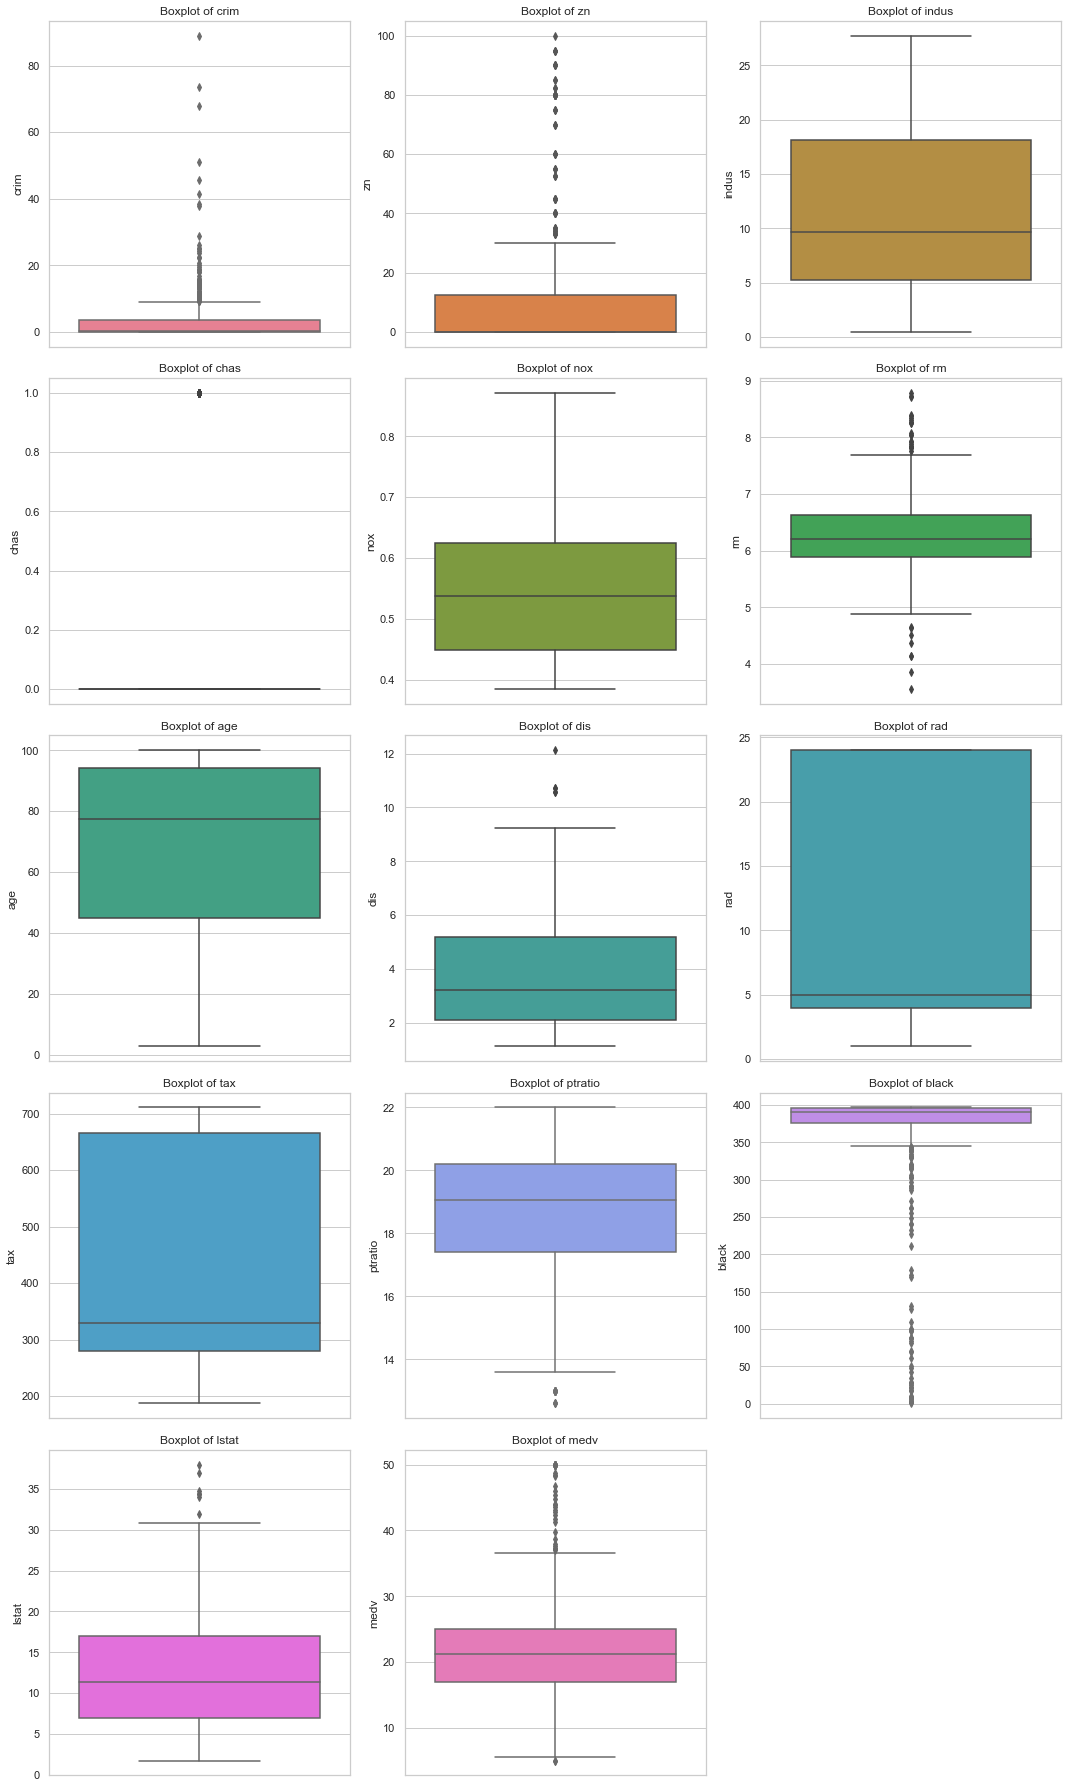

In [19]:
# Visualising outliers using boxplot

print("Boxplot for all features: \n")
numerical_columns = data.select_dtypes(include='number').columns
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
color_palette = sns.color_palette("husl", n_colors=num_cols)
plt.figure(figsize=(15, 5 * num_rows))
sns.set(style="whitegrid")
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=data[column], color=color_palette[i - 1])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Data Preparation 


In [432]:
y_median = np.median(data['crim'])
y_median

0.25651

In [433]:
y = (data['crim'] > y_median)
y

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool

In [434]:
sum(y)

253

In [435]:
data['target'] = y

In [436]:
data

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  target  
0       15.3  396.90   4.98  24.0   False  
1       17.8  396.90   9.14  21.6   False  
2       17.8  392.83   4.03  34.7   False  
3       18.7  394.63   2.94  33.4   False  
4       18.7  396.90   5.33  36.2   False  
..       ...     ...    ...   ...     ...  
501     21.0  391.99   9.67  22.4   False  
502     21.0  396.90   9.08  20.6   False  
503     21.0  396.90   5.64  23.9   False  
504     21.0  393.45   6.48  22.0   False  
505     21.0  396.90   7.88  11.9   False  

[506 rows x 15 columns]

In [437]:
X = data.iloc[:,:14].values
y = data.iloc[:,14].values


# Linear Regression


In [421]:
##Train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Shape of training set: ",X_train.shape)
print("Shape of testing set: ",X_test.shape)

Shape of training set:  (379, 14)
Shape of testing set:  (127, 14)


In [423]:
reg= LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_pred_train=reg.predict(X_train)
print("Coefficient of Linear Regression: ",reg.coef_)
print("Intercept of Linear Regression: ",reg.intercept_)

Coefficient of Linear Regression:  [ 0.01166075 -0.03559289  0.02818056 -0.0012968   0.22635726  0.0015621
  0.07187933  0.02420881  0.14126721 -0.0225955   0.02705624 -0.02081112
  0.02390561  0.09615458]
Intercept of Linear Regression:  0.5092348284960418


In [424]:
y_pred[y_pred>0.4] = 1
y_pred[y_pred<0.4] = 0

y_pred_train[y_pred_train>0.5] = 1
y_pred_train[y_pred_train<0.5] = 0

In [425]:
#Confusion Matrix
cm_test=confusion_matrix(y_test,y_pred)
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix on fitting Linear Regression On Training Data:")
print(cm_train)
print("Confusion matrix on fitting Linear Regression On Testing Data:")
print(cm_test)

Confusion matrix on fitting Linear Regression On Training Data:
[[176  10]
 [ 45 148]]
Confusion matrix on fitting Linear Regression On Testing Data:
[[57 10]
 [ 4 56]]


Confusion matrix using Heatmap On Training Data:


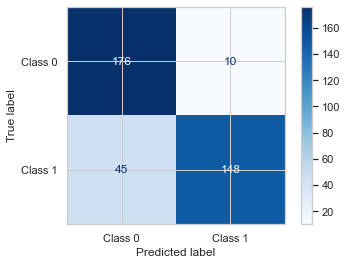

Confusion matrix using Heatmap On Testing Data:


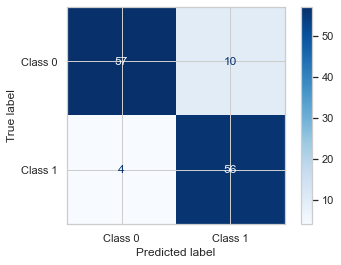

In [426]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion matrix using Heatmap On Training Data:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
print("Confusion matrix using Heatmap On Testing Data:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [427]:
def print_scores(cm):
  print("False Positive rate is:{}".format(cm[0][1]/(cm[0][1]+cm[0][0])))
  print("True Positive rate is:{}".format(cm[1][1]/(cm[1][1]+cm[1][0])))
  print("False Negative rate is:{}".format(cm[1][0]/(cm[1][0]+cm[1][1])))
  print("True negative rate is:{}".format(cm[0][0]/(cm[0][0]+cm[0][1])))
  print("Accuracy Score is:{}".format((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

#Score Report
print("Scores of Linear Regression on Training DataSet")
print_scores(cm_train)
print("\n")
print("Scores of Linear Regression on Testing DataSet")
print_scores(cm_test)

Scores of Linear Regression on Training DataSet
False Positive rate is:0.053763440860215055
True Positive rate is:0.7668393782383419
False Negative rate is:0.23316062176165803
True negative rate is:0.946236559139785
Accuracy Score is:0.8548812664907651


Scores of Linear Regression on Testing DataSet
False Positive rate is:0.14925373134328357
True Positive rate is:0.9333333333333333
False Negative rate is:0.06666666666666667
True negative rate is:0.8507462686567164
Accuracy Score is:0.889763779527559


In [428]:
print("Classification Report of Training set:\n",classification_report(y_train,y_pred_train,zero_division=False))
print("\n")
print("Classification Report of Testing set:\n",classification_report(y_test,y_pred,zero_division=False))

Classification Report of Training set:
               precision    recall  f1-score   support

       False       0.80      0.95      0.86       186
        True       0.94      0.77      0.84       193

    accuracy                           0.85       379
   macro avg       0.87      0.86      0.85       379
weighted avg       0.87      0.85      0.85       379



Classification Report of Testing set:
               precision    recall  f1-score   support

       False       0.93      0.85      0.89        67
        True       0.85      0.93      0.89        60

    accuracy                           0.89       127
   macro avg       0.89      0.89      0.89       127
weighted avg       0.89      0.89      0.89       127



In [429]:
# Calculating error metrices
from sklearn import metrics

mse_test = metrics.mean_squared_error(y_test, y_pred)
amse_test = metrics.mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

mse_train = metrics.mean_squared_error(y_train, y_pred_train)
amse_train = metrics.mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))


print('\nMetrics for Training Data:')
print('Mean Absolute Error:', amse_train)
print('Mean Square Error:', mse_train)
print('Root Mean Square Error:', rmse_train)

print("\n")

print('Metrics for Test Data:')
print('Mean Absolute Error:', amse_test)
print('Mean Square Error:', mse_test)
print('Root Mean Square Error:', rmse_test)


Metrics for Training Data:
Mean Absolute Error: 0.14511873350923482
Mean Square Error: 0.14511873350923482
Root Mean Square Error: 0.3809445281261234


Metrics for Test Data:
Mean Absolute Error: 0.11023622047244094
Mean Square Error: 0.11023622047244094
Root Mean Square Error: 0.3320184038158743


In [430]:
# K-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5,shuffle=True,random_state=42)
print("Following are different k_fold scores:\n")
print("For original dataset: ",cross_val_score(reg, X, y, cv=k_fold).mean())
print("\nFor training set: ",cross_val_score(reg, X_train, y_train, cv=k_fold).mean())
print("\nFor testing set: ",cross_val_score(reg, X_test, y_test, cv=k_fold).mean())

Following are different k_fold scores:

For original dataset:  0.5805933566884987

For training set:  0.548640988387735

For testing set:  0.4905147776794599



# Linear Discriminant Analysis (LDA) 

In [273]:
##Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [274]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

cl = LDA()
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)
y_pred_train = cl.predict(X_train)

In [275]:
y_pred


array([ True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False, False, False, False, False,
        True])

In [276]:
y_pred_train

array([False, False,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,

In [277]:
#Confusion Matrix
cm_test=confusion_matrix(y_test,y_pred)
cm_train=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix on fitting LDA On Training Data:")
print(cm_train)
print("Confusion matrix on fitting LDA On Testing Data:")
print(cm_test)

Confusion matrix on fitting LDA On Training Data:
[[176  13]
 [ 46 144]]
Confusion matrix on fitting LDA On Testing Data:
[[63  1]
 [10 53]]


Confusion matrix using Heatmap On Training Data:


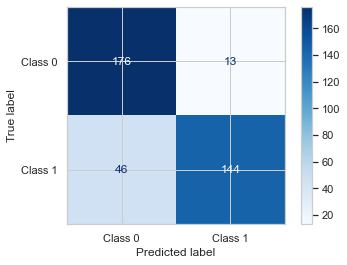

Confusion matrix using Heatmap On Testing Data:


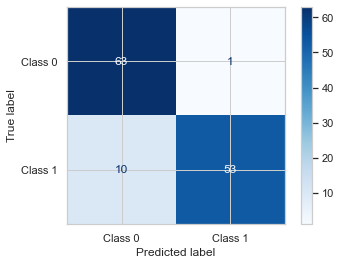

In [278]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion matrix using Heatmap On Training Data:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
print("Confusion matrix using Heatmap On Testing Data:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [279]:
def print_scores(cm):
  print("False Positive rate is:{}".format(cm[0][1]/(cm[0][1]+cm[0][0])))
  print("True Positive rate is:{}".format(cm[1][1]/(cm[1][1]+cm[1][0])))
  print("False Negative rate is:{}".format(cm[1][0]/(cm[1][0]+cm[1][1])))
  print("True negative rate is:{}".format(cm[0][0]/(cm[0][0]+cm[0][1])))
  print("Accuracy Score is:{}".format((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

#Score Report
print("Scores of LDA on Training DataSet")
print_scores(cm_train)
print("\n")
print("Scores of LDA on Testing DataSet")
print_scores(cm_test)

Scores of LDA on Training DataSet
False Positive rate is:0.06878306878306878
True Positive rate is:0.7578947368421053
False Negative rate is:0.24210526315789474
True negative rate is:0.9312169312169312
Accuracy Score is:0.8443271767810027


Scores of LDA on Testing DataSet
False Positive rate is:0.015625
True Positive rate is:0.8412698412698413
False Negative rate is:0.15873015873015872
True negative rate is:0.984375
Accuracy Score is:0.9133858267716536


In [280]:
print("Classification Report of Training set:\n",classification_report(y_train,y_pred_train,zero_division=False))
print("\n")
print("Classification Report of Testing set:\n",classification_report(y_test,y_pred,zero_division=False))

Classification Report of Training set:
               precision    recall  f1-score   support

       False       0.79      0.93      0.86       189
        True       0.92      0.76      0.83       190

    accuracy                           0.84       379
   macro avg       0.85      0.84      0.84       379
weighted avg       0.86      0.84      0.84       379



Classification Report of Testing set:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92        64
        True       0.98      0.84      0.91        63

    accuracy                           0.91       127
   macro avg       0.92      0.91      0.91       127
weighted avg       0.92      0.91      0.91       127



In [281]:
# K-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5,shuffle=True,random_state=42)
print("Following are different k_fold scores:\n")
print("For original dataset: ",cross_val_score(LDA(), X, y, cv=k_fold).mean())
print("\nFor training set: ",cross_val_score(LDA(), X_train, y_train, cv=k_fold).mean())
print("\nFor testing set: ",cross_val_score(LDA(), X_test, y_test, cv=k_fold).mean())

Following are different k_fold scores:

For original dataset:  0.8418947777130654

For training set:  0.8285263157894736

For testing set:  0.8735384615384616


# Problem Statement 4

# Use the image given and compress it to 25%, 65% and 85% of the original image with SVD.


In [3]:
# import necesssary libraries

import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from math import floor

## Function to compress the RGB image by performing SVD on all 3 layers of image, i.e. Red, Green and Blue

Method used to find the value of k:

- Assuming original image has size of n x m for one layer i.e. either Red, Green or Blue, because the process is similar for all three.
- Now to compress the image we need to store 3 matrices of size m x k, k, n x k, taking the compression ratio to be c.
- We get the optimal value for k to be:

  - k = c * (n * m) / (n + 1 + m)

In [4]:
# function to compress the rgb image using Method 1


def compress_rgb_image_1(original_image, compression_ratio):
    image_red = original_image[:, :, 0]

    image_green = original_image[:, :, 1]

    image_blue = original_image[:, :, 2]

    original_row, original_column, _ = original_image.shape
    k = floor(
        (compression_ratio)
        * (original_row * original_column)
        / (original_row + 1 + original_column)
    )

    print("Optimal value of k for image to be compressed to", compression_ratio * 100, "% using Method 1 is", k)

    U_red, S_red, V_red = svd(image_red)
    U_green, S_green, V_green = svd(image_green)
    U_blue, S_blue, V_blue = svd(image_blue)

    U_red_k, S_red_k, V_red_k = U_red[:, 0:k], S_red[0:k], V_red[0:k, :]
    U_green_k, S_green_k, V_green_k = U_green[:, 0:k], S_green[0:k], V_green[0:k, :]
    U_blue_k, S_blue_k, V_blue_k = U_blue[:, 0:k], S_blue[0:k], V_blue[0:k, :]

    image_red_k = np.dot(U_red_k, np.dot(np.diag(S_red_k), V_red_k))
    image_green_k = np.dot(U_green_k, np.dot(np.diag(S_green_k), V_green_k))
    image_blue_k = np.dot(U_blue_k, np.dot(np.diag(S_blue_k), V_blue_k))

    new_image = np.zeros((original_row, original_column, 3))
    new_image[:, :, 0] = image_red_k
    new_image[:, :, 1] = image_green_k
    new_image[:, :, 2] = image_blue_k
    new_image = np.floor(new_image).astype(int)

    new_image[new_image < 0] = 0
    new_image[new_image > 255] = 255

    return new_image

In [5]:
# compress image to 25%, 65%, 85% of the original image

image_path = "Data/Image 2.jpg"

original_image = plt.imread(image_path)

compressed_rgb_image_1_25 = compress_rgb_image_1(original_image, 0.25)
compressed_rgb_image_1_65 = compress_rgb_image_1(original_image, 0.65)
compressed_rgb_image_1_85 = compress_rgb_image_1(original_image, 0.85)

Optimal value of k for image to be compressed to 25.0 % using Method 1 is 172
Optimal value of k for image to be compressed to 65.0 % using Method 1 is 449
Optimal value of k for image to be compressed to 85.0 % using Method 1 is 587


In [6]:
original_image.shape

(1080, 1920, 3)

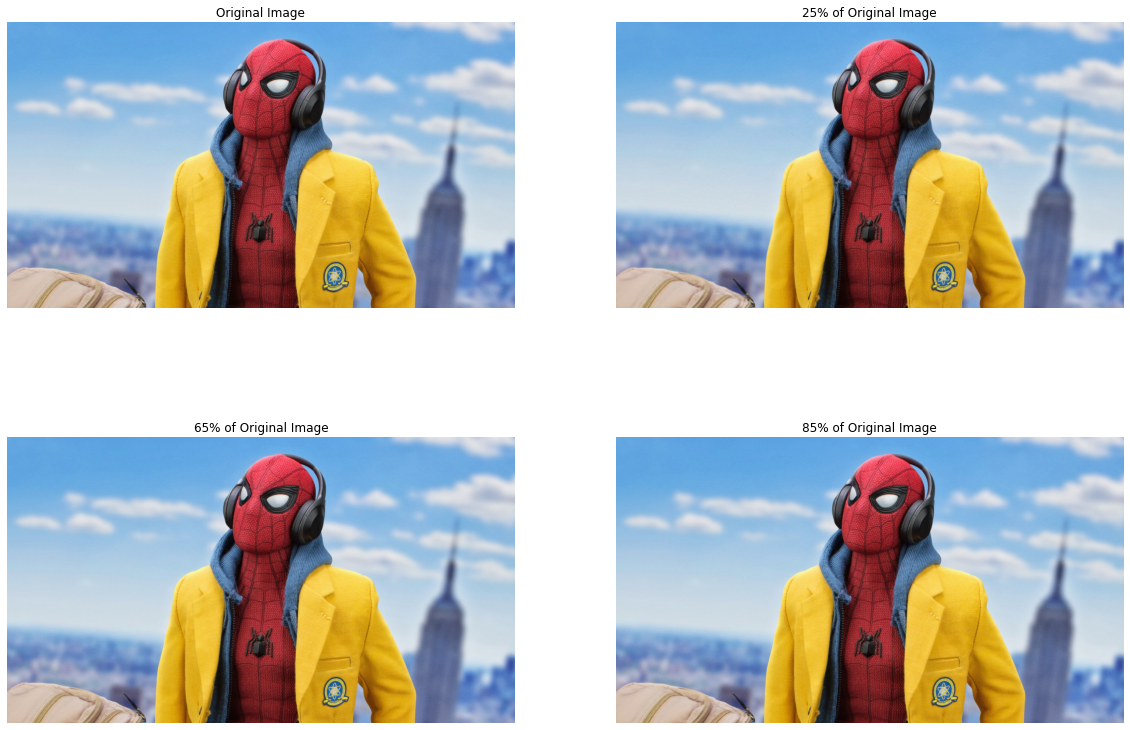

In [7]:
fig = plt.figure(figsize=(20, 14))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(compressed_rgb_image_1_25)
plt.axis("off")
plt.title("25% of Original Image")

fig.add_subplot(rows, columns, 3)

plt.imshow(compressed_rgb_image_1_65)
plt.axis("off")
plt.title("65% of Original Image")

fig.add_subplot(rows, columns, 4)

plt.imshow(compressed_rgb_image_1_85)
plt.axis("off")
plt.title("85% of Original Image")

plt.show()

Optimal value of k for image to be compressed to 5.0 % using Method 1 is 34


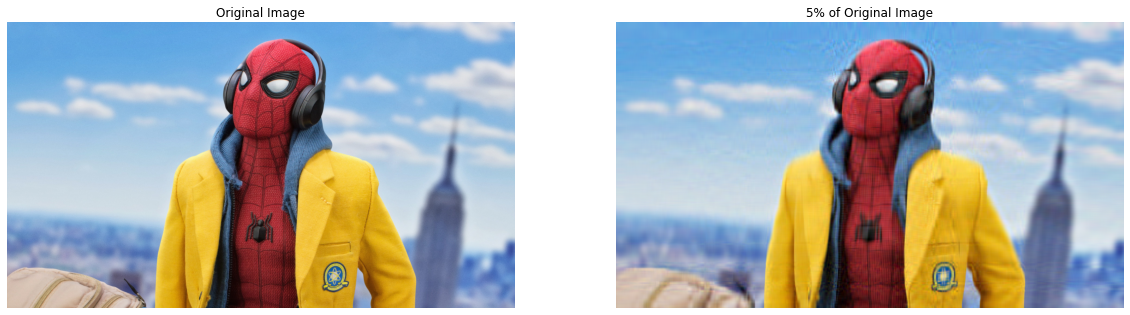

In [8]:
compressed_rgb_image_1_5 = compress_rgb_image_1(original_image, 0.05)

fig = plt.figure(figsize=(20, 14))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(compressed_rgb_image_1_5)
plt.axis("off")
plt.title("5% of Original Image")

plt.show()

In [9]:
# function to compress the rgb image using Method 2


def compress_rgb_image_2(original_image, compression_ratio):
    image_red = original_image[:, :, 0]

    image_green = original_image[:, :, 1]

    image_blue = original_image[:, :, 2]

    original_row, original_column, _ = original_image.shape

    U_red, S_red, V_red = svd(image_red)
    U_green, S_green, V_green = svd(image_green)
    U_blue, S_blue, V_blue = svd(image_blue)

    sum = np.sum(S_red)
    sumk = S_red[0]

    for k in range(1, len(S_red)):
        if sumk/sum >= compression_ratio:
            break
        else:
            sumk += S_red[k]
            
    print("Optimal value of k for image to be compressed to", compression_ratio * 100, "% using Method 1 is", k)

    U_red_k, S_red_k, V_red_k = U_red[:, 0:k], S_red[0:k], V_red[0:k, :]
    U_green_k, S_green_k, V_green_k = U_green[:, 0:k], S_green[0:k], V_green[0:k, :]
    U_blue_k, S_blue_k, V_blue_k = U_blue[:, 0:k], S_blue[0:k], V_blue[0:k, :]

    image_red_k = np.dot(U_red_k, np.dot(np.diag(S_red_k), V_red_k))
    image_green_k = np.dot(U_green_k, np.dot(np.diag(S_green_k), V_green_k))
    image_blue_k = np.dot(U_blue_k, np.dot(np.diag(S_blue_k), V_blue_k))

    new_image = np.zeros((original_row, original_column, 3))
    new_image[:, :, 0] = image_red_k
    new_image[:, :, 1] = image_green_k
    new_image[:, :, 2] = image_blue_k
    new_image = np.floor(new_image).astype(int)

    new_image[new_image < 0] = 0
    new_image[new_image > 255] = 255

    return new_image

In [10]:
# compress image to 25%, 65%, 85% of the original image

image_path = "Data/Image 2.jpg"

original_image = plt.imread(image_path)

compressed_rgb_image_2_25 = compress_rgb_image_2(original_image, 0.25)
compressed_rgb_image_2_65 = compress_rgb_image_2(original_image, 0.65)
compressed_rgb_image_2_85 = compress_rgb_image_2(original_image, 0.85)

Optimal value of k for image to be compressed to 25.0 % using Method 1 is 1
Optimal value of k for image to be compressed to 65.0 % using Method 1 is 45
Optimal value of k for image to be compressed to 85.0 % using Method 1 is 297


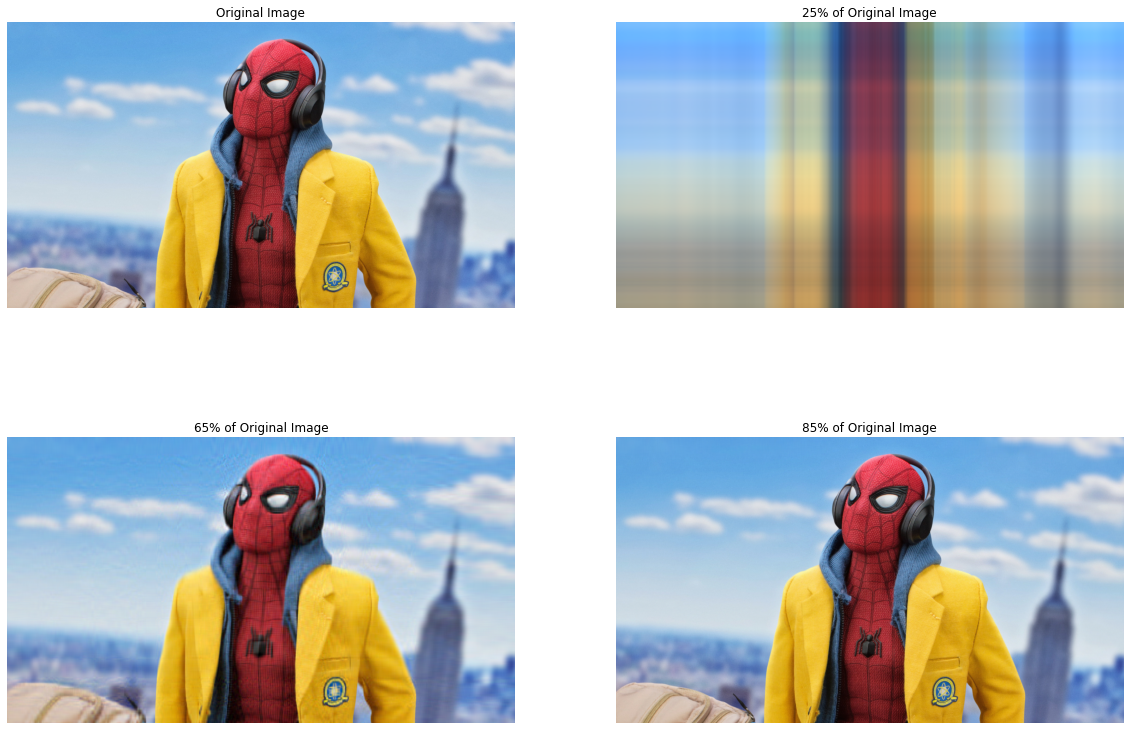

In [11]:
fig = plt.figure(figsize=(20, 14))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(compressed_rgb_image_2_25)
plt.axis("off")
plt.title("25% of Original Image")

fig.add_subplot(rows, columns, 3)

plt.imshow(compressed_rgb_image_2_65)
plt.axis("off")
plt.title("65% of Original Image")

fig.add_subplot(rows, columns, 4)

plt.imshow(compressed_rgb_image_2_85)
plt.axis("off")
plt.title("85% of Original Image")

plt.show()

In [12]:
# function to compress gray image using Method 1

def compress_gray_image_1(original_image, compression_ratio):
    original_row, original_column = original_image.shape
    k = floor(
        (compression_ratio)
        * (original_row * original_column)
        / (original_row + 1 + original_column)
    )

    U_gray, S_gray, V_gray = svd(original_image)

    U_gray_k, S_gray_k, V_gray_k = U_gray[:, 0:k], S_gray[0:k], V_gray[0:k, :]

    new_image = np.dot(U_gray_k, np.dot(np.diag(S_gray_k), V_gray_k))

    return new_image

In [13]:
from skimage.color import rgb2gray

In [14]:
# compress image to 25%, 65%, 85% of the original image

image_path = "Data/Image 2.jpg"

original_image = plt.imread(image_path)
original_image = rgb2gray(original_image)

compressed_gray_image_1_25 = compress_gray_image_1(original_image, 0.25)
compressed_gray_image_1_65 = compress_gray_image_1(original_image, 0.65)
compressed_gray_image_1_85 = compress_gray_image_1(original_image, 0.85)

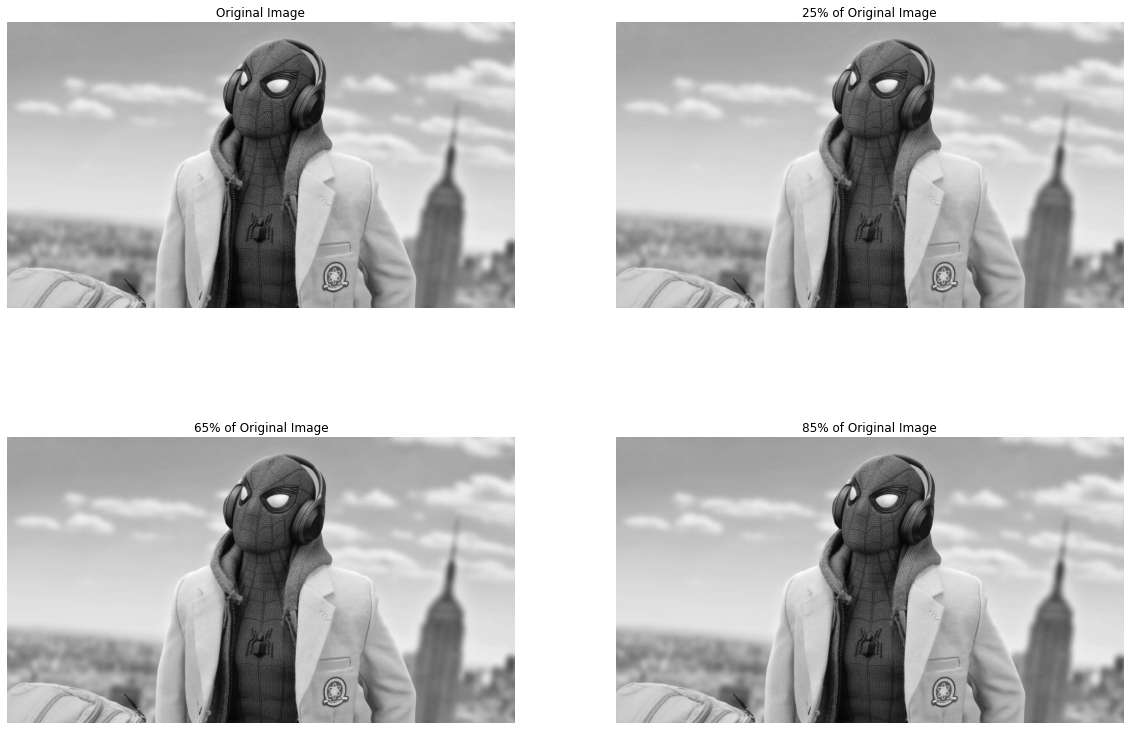

In [15]:
fig = plt.figure(figsize=(20, 14))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(original_image, cmap = 'gray')
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(compressed_gray_image_1_25, cmap = 'gray')
plt.axis("off")
plt.title("25% of Original Image")

fig.add_subplot(rows, columns, 3)

plt.imshow(compressed_gray_image_1_65, cmap = 'gray')
plt.axis("off")
plt.title("65% of Original Image")

fig.add_subplot(rows, columns, 4)

plt.imshow(compressed_gray_image_1_85, cmap = 'gray')
plt.axis("off")
plt.title("85% of Original Image")

plt.show()

## Method 2

Method used to find the value of k:

- Assuming original image has size of n x m for one layer i.e. either Red, Green or Blue, because the process is similar for all three.
- The singular values generated by the Singular Value Decomposition of original images is S (sorted in descending order), and compression ratio is c.
- We get the optimal value for k to be:

  - k = Sum(S[i to k]) 
    - where
      - Sum(S[i to k]) / Sum(S[i to n]) >= c

In [16]:
# function to compress gray image using Method 2

def compress_gray_image_2(original_image, compression_ratio):
    U_gray, S_gray, V_gray = svd(original_image)

    sum = np.sum(S_gray)
    sumk = S_gray[0]

    for k in range(1, len(S_gray)):
        if sumk/sum >= compression_ratio:
            break
        else:
            sumk += S_gray[k]
            
    print("Optimal value of k for image to be compressed to", compression_ratio * 100, "% using Method 2 is", k)

    U_gray_k, S_gray_k, V_gray_k = U_gray[:, 0:k], S_gray[0:k], V_gray[0:k, :]

    new_image = np.dot(U_gray_k, np.dot(np.diag(S_gray_k), V_gray_k))

    return new_image

In [17]:
# compress image to 25%, 65%, 85% of the original image

image_path = "Data/Image 2.jpg"

original_image = plt.imread(image_path)
original_image = rgb2gray(original_image)

compressed_gray_image_2_25 = compress_gray_image_2(original_image, 0.25)
compressed_gray_image_2_65 = compress_gray_image_2(original_image, 0.65)
compressed_gray_image_2_85 = compress_gray_image_2(original_image, 0.85)

Optimal value of k for image to be compressed to 25.0 % using Method 2 is 1
Optimal value of k for image to be compressed to 65.0 % using Method 2 is 52
Optimal value of k for image to be compressed to 85.0 % using Method 2 is 329


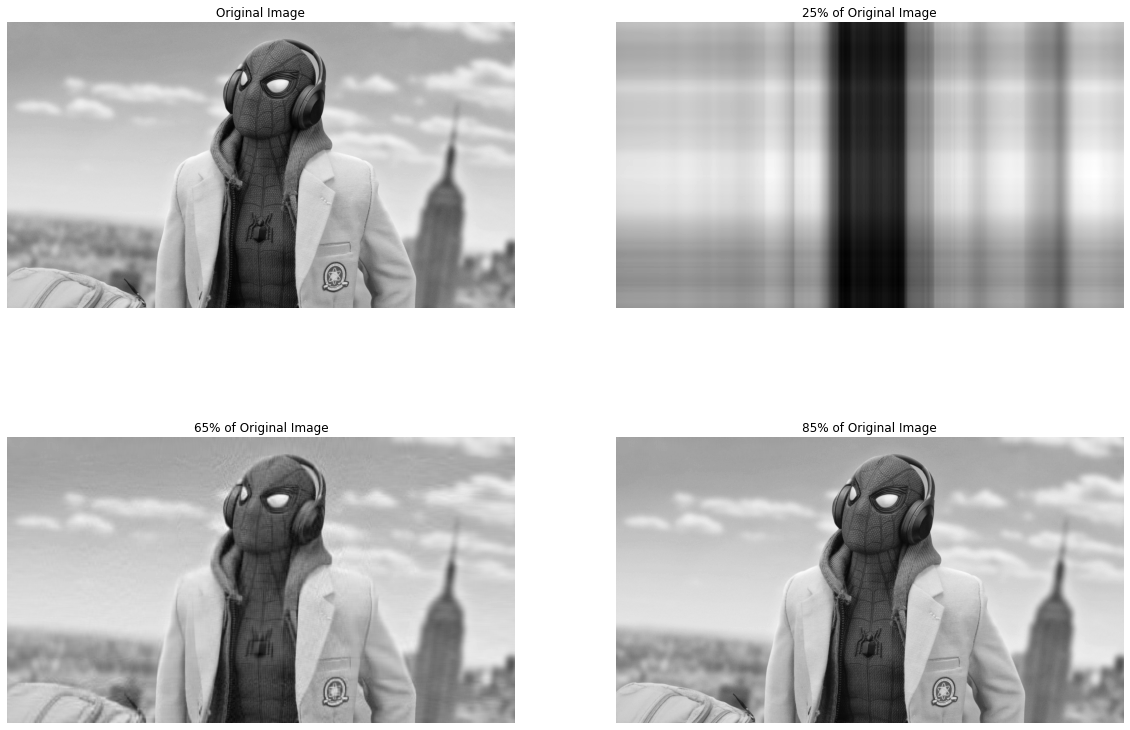

In [18]:
fig = plt.figure(figsize=(20, 14))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(original_image, cmap = 'gray')
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)

plt.imshow(compressed_gray_image_2_25, cmap = 'gray')
plt.axis("off")
plt.title("25% of Original Image")

fig.add_subplot(rows, columns, 3)

plt.imshow(compressed_gray_image_2_65, cmap = 'gray')
plt.axis("off")
plt.title("65% of Original Image")

fig.add_subplot(rows, columns, 4)

plt.imshow(compressed_gray_image_2_85, cmap = 'gray')
plt.axis("off")
plt.title("85% of Original Image")

plt.show()